In [1]:
# Install standard analytics libraries
import numpy as np
import pandas as pd
from pathlib import Path
import re
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from datetime import datetime, timedelta
import os

print('Libraries imported.')

Libraries imported.


In [2]:
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.mlab as mlab

# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [3]:
# Define path for folder with png docs
file_name = 'Airport_Compressor_4_Updated_Descriptions'

path1 = Path.home().joinpath('Documents', 'EnLink', file_name + '.xlsx')
out_path = Path.home().joinpath('Documents', 'EnLink')

# Create folder for analysis files
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Define path for excel report
out_file = path1.stem +'_Analysis_v1.xlsx'
excel_out = Path.home().joinpath(out_path, out_file)
writer = pd.ExcelWriter(excel_out, engine='xlsxwriter')

# Create folder for analysis file
if not os.path.exists(out_path):
    os.makedirs(out_path)
    
print('File to read:', path1)

File to read: C:\Users\jmchale\Documents\EnLink\Airport_Compressor_4_Updated_Descriptions.xlsx


In [4]:
# Read file and create dataframe
df = pd.read_excel(path1)
print('Data read into a dataframe.')

Data read into a dataframe.


In [5]:
display(df.head())

Unnamed: 0             1 stage pressure           Unnamed: 2  \
0            Date-Time  GCS_MIDW_AIRPORT_CMP4_1STSP            Date-Time   
1  2019-10-31T09:07:27                          124  2019-10-31T09:47:27   
2  2019-10-31T09:59:28                          125  2019-10-31T09:53:27   
3  2019-10-31T10:01:27                          124  2019-10-31T09:59:28   
4  2019-10-31T10:09:27                          125  2019-10-31T10:01:27   

            2nd stage pressure           Unnamed: 4  \
0  GCS_MIDW_AIRPORT_CMP4_2NDSP            Date-Time   
1                          416  2019-10-31T09:49:27   
2                          418  2019-10-31T09:53:27   
3                          416  2019-10-31T09:55:27   
4                          418  2019-10-31T09:59:28   

            3rd stage pressure           Unnamed: 6  \
0  GCS_MIDW_AIRPORT_CMP4_3RDSP            Date-Time   
1                         1122  2019-10-31T09:51:28   
2                         1127  2019-10-31T09:53:27   
3                         1129  2019-10-31T09:55:27   
4                         1122  2019-10-31T09:57:27   

            compressor oil pressure           Unnamed: 8  \
0  GCS_MIDW_AIRPORT_CMP4_CMPOILPRES            Date-Time   
1                                55  2019-10-31T09:49:27   
2                                54  2019-10-31T09:55:27   
3                                55  2019-10-31T09:57:27   
4                                54  2019-10-31T09:59:28   

             compressor oil temp  ...          Unnamed: 20  \
0  GCS_MIDW_AIRPORT_CMP4_CMPOILT  ...            Date-Time   
1                            173  ...  2019-10-31T09:51:28   
2                            172  ...  2019-10-31T09:53:27   
3                            173  ...  2019-10-31T09:55:27   
4                            172  ...  2019-10-31T09:57:27   

               Cylinder 4 Temp          Unnamed: 22  \
0  GCS_MIDW_AIRPORT_CMP4_CYL4T            Date-Time   
1                          265  2019-10-31T09:47:27   
2                          266  2019-10-31T09:53:27   
3                          267  2019-10-31T09:55:27   
4                          265  2019-10-31T09:57:27   

              Engine Vibration 1          Unnamed: 24  \
0  GCS_MIDW_AIRPORT_CMP4_ENGVIB1            Date-Time   
1                             95  2019-10-31T09:51:28   
2                             94  2019-10-31T09:53:27   
3                             95  2019-10-31T09:55:27   
4                             93  2019-10-31T09:57:27   

              Compressor RPMs          Unnamed: 26  \
0  GCS_MIDW_AIRPORT_CMP4_RPMS            Date-Time   
1                        1376  2019-11-01T10:57:28   
2                        1375  2019-11-01T11:45:26   
3                        1382  2019-11-01T17:17:27   
4                        1375  2019-11-01T18:31:26   

           Compressor Run Status          Unnamed: 28  \
0  GCS_MIDW_AIRPORT_CMP4_RSTATUS            Date-Time   
1                              0  2019-10-31T09:51:28   
2                              1  2019-10-31T09:53:27   
3                              0  2019-10-31T09:55:27   
4                              1  2019-10-31T09:57:27   

       Comprssor Suction Pressure  
0  GCS_MIDW_AIRPORT_CMP4_SUCPRESS  
1                             255  
2                             257  
3                             255  
4                             257  

[5 rows x 30 columns]

In [6]:
# print the dimensions of the dataframe
print('Shape of dataframe is', df.shape[0], 'rows by', df.shape[1], 'columns.')
df_cols=df.columns
df_cols

Shape of dataframe is 192842 rows by 30 columns.


Index(['Unnamed: 0', '1 stage pressure', 'Unnamed: 2', '2nd stage pressure',
       'Unnamed: 4', '3rd stage pressure', 'Unnamed: 6',
       'compressor oil pressure', 'Unnamed: 8', 'compressor oil temp',
       'Unnamed: 10', 'Vibration 1', 'Unnamed: 12', 'Cooler Vibration',
       'Unnamed: 14', 'Cylinder 1 Temp', 'Unnamed: 16', 'Cylinder 2 Temp',
       'Unnamed: 18', 'Cylinder 3 Temp', 'Unnamed: 20', 'Cylinder 4 Temp',
       'Unnamed: 22', 'Engine Vibration 1', 'Unnamed: 24', 'Compressor RPMs',
       'Unnamed: 26', 'Compressor Run Status', 'Unnamed: 28',
       'Comprssor Suction Pressure'],
      dtype='object')

In [10]:
# Pass new column names
cols=['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

# Loop through an rename columns
n=0
while n <df.shape[1]:
    df.rename(columns={df_cols[n]:cols[n]}, inplace=True)
    n=n+1
display(df)

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP          Date-Time.1  \
0                 Date-Time  GCS_MIDW_AIRPORT_CMP4_1STSP            Date-Time   
1       2019-10-31T09:07:27                          124  2019-10-31T09:47:27   
2       2019-10-31T09:59:28                          125  2019-10-31T09:53:27   
3       2019-10-31T10:01:27                          124  2019-10-31T09:59:28   
4       2019-10-31T10:09:27                          125  2019-10-31T10:01:27   
...                     ...                          ...                  ...   
192837                  NaN                          NaN                  NaN   
192838                  NaN                          NaN                  NaN   
192839                  NaN                          NaN                  NaN   
192840                  NaN                          NaN                  NaN   
192841                  NaN                          NaN                  NaN   

        GCS_MIDW_AIRPORT_CMP2_2NDSP          Date-Time.2  \
0       GCS_MIDW_AIRPORT_CMP4_2NDSP            Date-Time   
1                               416  2019-10-31T09:49:27   
2                               418  2019-10-31T09:53:27   
3                               416  2019-10-31T09:55:27   
4                               418  2019-10-31T09:59:28   
...                             ...                  ...   
192837                          NaN                  NaN   
192838                          NaN                  NaN   
192839                          NaN                  NaN   
192840                          NaN                  NaN   
192841                          NaN                  NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP          Date-Time.3  \
0       GCS_MIDW_AIRPORT_CMP4_3RDSP            Date-Time   
1                              1122  2019-10-31T09:51:28   
2                              1127  2019-10-31T09:53:27   
3                              1129  2019-10-31T09:55:27   
4                              1122  2019-10-31T09:57:27   
...                             ...                  ...   
192837                          NaN                  NaN   
192838                          NaN                  NaN   
192839                          NaN                  NaN   
192840                          NaN                  NaN   
192841                          NaN                  NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES          Date-Time.4  \
0       GCS_MIDW_AIRPORT_CMP4_CMPOILPRES            Date-Time   
1                                     55  2019-10-31T09:49:27   
2                                     54  2019-10-31T09:55:27   
3                                     55  2019-10-31T09:57:27   
4                                     54  2019-10-31T09:59:28   
...                                  ...                  ...   
192837                               NaN                  NaN   
192838                               NaN                  NaN   
192839                               NaN                  NaN   
192840                               NaN                  NaN   
192841                               NaN                  NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...         Date-Time.10  \
0       GCS_MIDW_AIRPORT_CMP4_CMPOILT  ...            Date-Time   
1                                 173  ...  2019-10-31T09:51:28   
2                                 172  ...  2019-10-31T09:53:27   
3                                 173  ...  2019-10-31T09:55:27   
4                                 172  ...  2019-10-31T09:57:27   
...                               ...  ...                  ...   
192837                            NaN  ...                  NaN   
192838                            NaN  ...                  NaN   
192839                            NaN  ...                  NaN   
192840                            NaN  ...                  NaN   
192841                            NaN  ...                  NaN   

        GCS_MIDW_

## Create dataframe with normalized data

In [11]:
# Copy df
df_norm = df.copy(deep=True)

# Make column list
df_norm_cols=df_norm.columns

# Make Data Column list
df_norm_data_cols = []
n=1
while n < df_norm.shape[1]:
    df_norm_data_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_data_cols)

# Make Date Column list
df_norm_date_cols = []
n=0
while n < df_norm.shape[1]:
    df_norm_date_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [12]:
# Convert dates to datetimes
df_norm[df_norm_date_cols] = df_norm[df_norm_date_cols].apply(pd.to_datetime, errors='coerce')

# Convert data to numeric
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].apply(pd.to_numeric, errors='coerce')
df_norm.dtypes

Date-Time                           datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_1STSP                float64
Date-Time.1                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_2NDSP                float64
Date-Time.2                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_3RDSP                float64
Date-Time.3                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES           float64
Date-Time.4                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILT              float64
Date-Time.5                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPVIB1              float64
Date-Time.6                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_COOLERVIB            float64
Date-Time.7                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL1T                float64
Date-Time.8                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL2T                float64
Date-Time.9                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL3T    

In [13]:
# Normalize data
n=1
while n < df_norm.shape[1]:
    df_norm[df_norm_cols[n]] = df_norm[df_norm_cols[n]]/df_norm[df_norm_cols[n]].mean()
    n=n+2
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 81110.000000                140116.000000   
mean                      1.000000                     1.000000   
std                       0.135087                     0.097641   
min                       0.000000                     0.000000   
25%                       0.947727                     0.974590   
50%                       0.971822                     0.997197   
75%                       1.100328                     1.037386   
max                       1.477812                     1.519657   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138349.000000                     125233.000000   
mean                      1.000000                          1.000000   
std                       0.100194                          0.084249   
min                       0.000000                          0.000000   
25%                       0.994191                          0.930490   
50%                       1.014556                          1.033878   
75%                       1.031219                          1.051109   
max                       1.109903                          1.464660   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                   97991.000000                  156484.000000   
mean                        1.000000                       1.000000   
std                         1.205165                       0.145149   
min                         0.000000                       0.000000   
25%                         0.986799                       0.943602   
50%                         1.004112                       1.029384   
75%                         1.021424                       1.086572   
max                       377.892263                       1.386810   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    152526.000000                113021.000000   
mean                          1.000000                     1.000000   
std                           0.218489                     0.093374   
min                           0.000000                     0.000000   
25%                           0.851189                     0.948951   
50%                           0.951329                     0.995054   
75%                           1.101538                     1.060367   
max                           2.803916                     7.883596   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                127715.000000                144331.000000   
mean                      1.000000                     1.000000   
std                       0.093603                     0.083977   
min                       0.000000                     0.000000   
25%                       0.963642                     0.950241   
50%                       1.010649                     0.997360   
75%                       1.049821                     1.060186   
max                       1.355366                     1.189764   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                129656.000000                  160528.000000   
mean                      1.000000                       1.000000   
std                       0.086142                       0.139244   
min                       0.000000                       0.000000   
25%                       0.965238                       0.932786   
50%                       0.999040                       1.022693   
75%                       1.051621                       1.078885   
max                       1.198097                       1.460991   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               190805.000000                     368.000000   
mean                     1.000000                       1.000000   
std                      0.044289           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0                      NaT                          NaN                 NaT   
1      2019-10-31 09:07:27                     0.995917 2019-10-31 09:47:27   
2      2019-10-31 09:59:28                     1.003948 2019-10-31 09:53:27   
3      2019-10-31 10:01:27                     0.995917 2019-10-31 09:59:28   
4      2019-10-31 10:09:27                     1.003948 2019-10-31 10:01:27   
...                    ...                          ...                 ...   
192837                 NaT                          NaN                 NaT   
192838                 NaT                          NaN                 NaT   
192839                 NaT                          NaN                 NaT   
192840                 NaT                          NaN                 NaT   
192841                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                               NaN                 NaT   
1                          1.044921 2019-10-31 09:49:27   
2                          1.049945 2019-10-31 09:53:27   
3                          1.044921 2019-10-31 09:55:27   
4                          1.049945 2019-10-31 09:59:28   
...                             ...                 ...   
192837                          NaN                 NaT   
192838                          NaN                 NaT   
192839                          NaN                 NaT   
192840                          NaN                 NaT   
192841                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                               NaN                 NaT   
1                          1.038624 2019-10-31 09:51:28   
2                          1.043253 2019-10-31 09:53:27   
3                          1.045104 2019-10-31 09:55:27   
4                          1.038624 2019-10-31 09:57:27   
...                             ...                 ...   
192837                          NaN                 NaT   
192838                          NaN                 NaT   
192839                          NaN                 NaT   
192840                          NaN                 NaT   
192841                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                                    NaN                 NaT   
1                               0.947721 2019-10-31 09:49:27   
2                               0.930490 2019-10-31 09:55:27   
3                               0.947721 2019-10-31 09:57:27   
4                               0.930490 2019-10-31 09:59:28   
...                                  ...                 ...   
192837                               NaN                 NaT   
192838                               NaN                 NaT   
192839                               NaN                 NaT   
192840                               NaN                 NaT   
192841                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                                 NaN  ...                 NaT   
1                            0.998341  ... 2019-10-31 09:51:28   
2                            0.992570  ... 2019-10-31 09:53:27   
3                            0.998341  ... 2019-10-31 09:55:27   
4                            0.992570  ... 2019-10-31 09:57:27   
...                               ...  ...                 ...   
192837                            NaN  ...                 NaT   
192838                            NaN  ...                 NaT   
192839                            NaN  ...                 NaT   
192840                            NaN  ...                 NaT   
192841                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                            

In [14]:
# Replace values >5 or <0.0001 with NAN
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x < 0.0001 else x)
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x > 5 else x)
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 81010.000000                140041.000000   
mean                      1.001234                     1.000536   
std                       0.130519                     0.094884   
min                       0.008032                     0.002512   
25%                       0.947727                     0.974590   
50%                       0.971822                     0.997197   
75%                       1.100328                     1.037386   
max                       1.477812                     1.519657   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138174.000000                     125189.000000   
mean                      1.001267                          1.000351   
std                       0.093720                          0.082151   
min                       0.000926                          0.137850   
25%                       0.994191                          0.930490   
50%                       1.014556                          1.033878   
75%                       1.031219                          1.051109   
max                       1.109903                          1.464660   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                   97975.000000                  156341.000000   
mean                        0.996306                       1.000915   
std                         0.051399                       0.142028   
min                         0.455890                       0.014297   
25%                         0.986799                       0.943602   
50%                         1.004112                       1.029384   
75%                         1.021424                       1.086572   
max                         1.096444                       1.386810   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    151964.000000                113005.000000   
mean                          1.003698                     1.000072   
std                           0.210243                     0.090377   
min                           0.050070                     0.157518   
25%                           0.901259                     0.948951   
50%                           0.951329                     0.995054   
75%                           1.101538                     1.060367   
max                           2.803916                     1.225569   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                127700.000000                144316.000000   
mean                      1.000117                     1.000104   
std                       0.092978                     0.083360   
min                       0.094014                     0.164918   
25%                       0.963642                     0.950241   
50%                       1.010649                     0.997360   
75%                       1.049821                     1.060186   
max                       1.355366                     1.189764   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                129641.000000                  160379.000000   
mean                      1.000116                       1.000929   
std                       0.085473                       0.135930   
min                       0.146476                       0.011238   
25%                       0.965238                       0.932786   
50%                       0.999040                       1.022693   
75%                       1.051621                       1.078885   
max                       1.198097                       1.460991   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               190599.000000                   2.170000e+02   
mean                     1.001081                   1.695853e+00   
std                      0.029693           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0                      NaT                          NaN                 NaT   
1      2019-10-31 09:07:27                     0.995917 2019-10-31 09:47:27   
2      2019-10-31 09:59:28                     1.003948 2019-10-31 09:53:27   
3      2019-10-31 10:01:27                     0.995917 2019-10-31 09:59:28   
4      2019-10-31 10:09:27                     1.003948 2019-10-31 10:01:27   
...                    ...                          ...                 ...   
192837                 NaT                          NaN                 NaT   
192838                 NaT                          NaN                 NaT   
192839                 NaT                          NaN                 NaT   
192840                 NaT                          NaN                 NaT   
192841                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                               NaN                 NaT   
1                          1.044921 2019-10-31 09:49:27   
2                          1.049945 2019-10-31 09:53:27   
3                          1.044921 2019-10-31 09:55:27   
4                          1.049945 2019-10-31 09:59:28   
...                             ...                 ...   
192837                          NaN                 NaT   
192838                          NaN                 NaT   
192839                          NaN                 NaT   
192840                          NaN                 NaT   
192841                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                               NaN                 NaT   
1                          1.038624 2019-10-31 09:51:28   
2                          1.043253 2019-10-31 09:53:27   
3                          1.045104 2019-10-31 09:55:27   
4                          1.038624 2019-10-31 09:57:27   
...                             ...                 ...   
192837                          NaN                 NaT   
192838                          NaN                 NaT   
192839                          NaN                 NaT   
192840                          NaN                 NaT   
192841                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                                    NaN                 NaT   
1                               0.947721 2019-10-31 09:49:27   
2                               0.930490 2019-10-31 09:55:27   
3                               0.947721 2019-10-31 09:57:27   
4                               0.930490 2019-10-31 09:59:28   
...                                  ...                 ...   
192837                               NaN                 NaT   
192838                               NaN                 NaT   
192839                               NaN                 NaT   
192840                               NaN                 NaT   
192841                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                                 NaN  ...                 NaT   
1                            0.998341  ... 2019-10-31 09:51:28   
2                            0.992570  ... 2019-10-31 09:53:27   
3                            0.998341  ... 2019-10-31 09:55:27   
4                            0.992570  ... 2019-10-31 09:57:27   
...                               ...  ...                 ...   
192837                            NaN  ...                 NaT   
192838                            NaN  ...                 NaT   
192839                            NaN  ...                 NaT   
192840                            NaN  ...                 NaT   
192841                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                            

## BOXPLOTS

In [15]:
# Create dataframe without datetimes
df1 = df_norm[['GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
       'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']]
display(df1.head())

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                          NaN                          NaN   
1                     0.995917                     1.044921   
2                     1.003948                     1.049945   
3                     0.995917                     1.044921   
4                     1.003948                     1.049945   

   GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                          NaN                               NaN   
1                     1.038624                          0.947721   
2                     1.043253                          0.930490   
3                     1.045104                          0.947721   
4                     1.038624                          0.930490   

   GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                            NaN                            NaN   
1                       0.998341                       1.100869   
2                       0.992570                       1.072275   
3                       0.998341                       1.057978   
4                       0.992570                       1.115166   

   GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                              NaN                          NaN   
1                         1.101538                     0.925900   
2                         1.251748                     0.922058   
3                         1.101538                     0.925900   
4                         1.051468                     0.929742   

   GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                          NaN                          NaN   
1                     1.038070                     0.918828   
2                     1.034152                     0.922754   
3                     1.041987                     0.926681   
4                     1.038070                     0.930608   

   GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0                          NaN                            NaN   
1                     0.995284                       1.067647   
2                     0.999040                       1.056409   
3                     1.002796                       1.067647   
4                     0.995284                       1.045170   

   GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0                         NaN                            NaN   
1                    1.039596                            NaN   
2                    1.038840                       1.695853   
3                    1.044129                            NaN   
4                    1.038840                       1.695853   

   GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
0                             NaN  
1                        1.046622  
2                        1.054831  
3                        1.046622  
4                        1.054831

In [16]:
df1.dtypes

GCS_MIDW_AIRPORT_CMP2_1STSP         float64
GCS_MIDW_AIRPORT_CMP2_2NDSP         float64
GCS_MIDW_AIRPORT_CMP2_3RDSP         float64
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES    float64
GCS_MIDW_AIRPORT_CMP2_CMPOILT       float64
GCS_MIDW_AIRPORT_CMP2_CMPVIB1       float64
GCS_MIDW_AIRPORT_CMP2_COOLERVIB     float64
GCS_MIDW_AIRPORT_CMP2_CYL1T         float64
GCS_MIDW_AIRPORT_CMP2_CYL2T         float64
GCS_MIDW_AIRPORT_CMP2_CYL3T         float64
GCS_MIDW_AIRPORT_CMP2_CYL4T         float64
GCS_MIDW_AIRPORT_CMP2_ENGVIB1       float64
GCS_MIDW_AIRPORT_CMP2_RPMS          float64
GCS_MIDW_AIRPORT_CMP2_RSTATUS       float64
GCS_MIDW_AIRPORT_CMP2_SUCPRESS      float64
dtype: object

In [17]:
df1.columns

Index(['GCS_MIDW_AIRPORT_CMP2_1STSP', 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

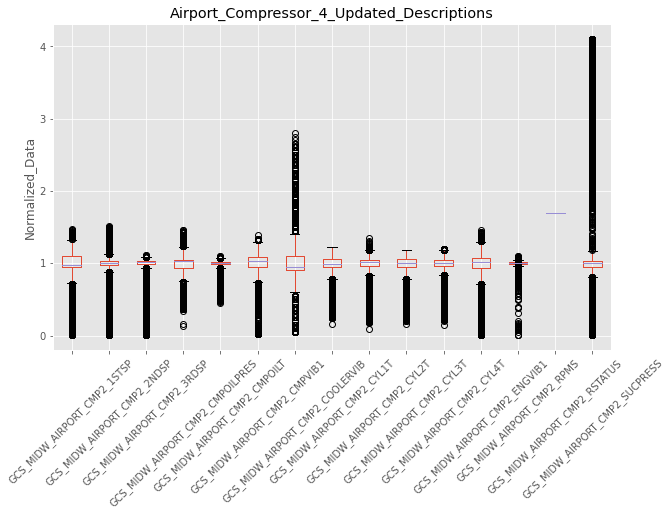

In [18]:
# Create boxplot of compressor data
df1.plot(kind='box', figsize=(10, 6))

plt.title(file_name)
plt.ylabel('Normalized_Data')
plt.xticks(rotation=45)

plt.show()

In [19]:
# Check for empty cells
df1.isna().describe()

GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                       192842                      192842   
unique                           2                           2   
top                           True                       False   
freq                        111832                      140041   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                       192842                           192842   
unique                           2                                2   
top                          False                            False   
freq                        138174                           125189   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                         192842                        192842   
unique                             2                             2   
top                            False                         False   
freq                           97975                        156341   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                           192842                      192842   
unique                               2                           2   
top                              False                       False   
freq                            151964                      113005   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                       192842                      192842   
unique                           2                           2   
top                          False                       False   
freq                        127700                      144316   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                       192842                        192842   
unique                           2                             2   
top                          False                         False   
freq                        129641                        160379   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                      192842                        192842   
unique                          2                             2   
top                         False                          True   
freq                       190599                        192625   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                          192842  
unique                              2  
top                              True  
freq                           114917

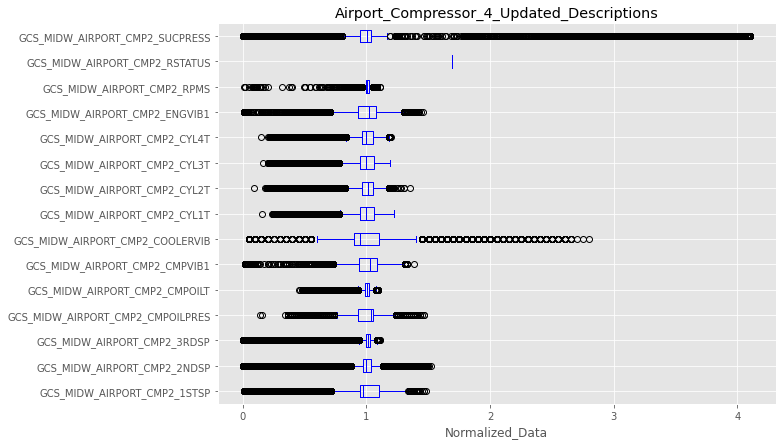

In [21]:
# horizontal box plots
df1.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title(file_name)
plt.xlabel('Normalized_Data')


plt.show()

## SUBPLOTS

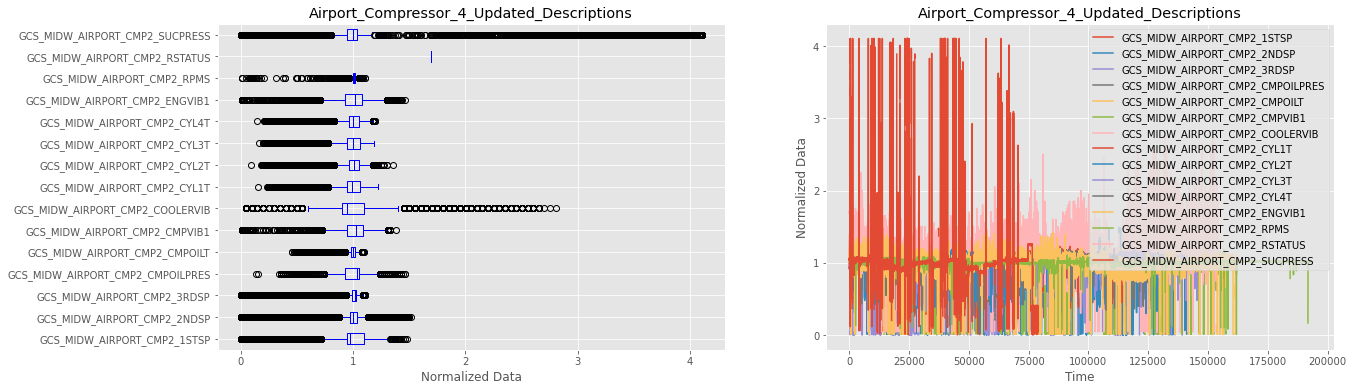

In [22]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df1.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title(file_name)
ax0.set_xlabel('Normalized Data')
#ax0.set_ylabel('Time')

# Subplot 2: Line plot
df1.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title (file_name)
ax1.set_ylabel('Normalized Data')
ax1.set_xlabel('Time')

plt.show()

## SCATTER PLOTS

In [23]:
# Copy new dataframe
df2=df_norm.copy(deep=True)
df2.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 81010.000000                140041.000000   
mean                      1.001234                     1.000536   
std                       0.130519                     0.094884   
min                       0.008032                     0.002512   
25%                       0.947727                     0.974590   
50%                       0.971822                     0.997197   
75%                       1.100328                     1.037386   
max                       1.477812                     1.519657   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138174.000000                     125189.000000   
mean                      1.001267                          1.000351   
std                       0.093720                          0.082151   
min                       0.000926                          0.137850   
25%                       0.994191                          0.930490   
50%                       1.014556                          1.033878   
75%                       1.031219                          1.051109   
max                       1.109903                          1.464660   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                   97975.000000                  156341.000000   
mean                        0.996306                       1.000915   
std                         0.051399                       0.142028   
min                         0.455890                       0.014297   
25%                         0.986799                       0.943602   
50%                         1.004112                       1.029384   
75%                         1.021424                       1.086572   
max                         1.096444                       1.386810   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    151964.000000                113005.000000   
mean                          1.003698                     1.000072   
std                           0.210243                     0.090377   
min                           0.050070                     0.157518   
25%                           0.901259                     0.948951   
50%                           0.951329                     0.995054   
75%                           1.101538                     1.060367   
max                           2.803916                     1.225569   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                127700.000000                144316.000000   
mean                      1.000117                     1.000104   
std                       0.092978                     0.083360   
min                       0.094014                     0.164918   
25%                       0.963642                     0.950241   
50%                       1.010649                     0.997360   
75%                       1.049821                     1.060186   
max                       1.355366                     1.189764   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                129641.000000                  160379.000000   
mean                      1.000116                       1.000929   
std                       0.085473                       0.135930   
min                       0.146476                       0.011238   
25%                       0.965238                       0.932786   
50%                       0.999040                       1.022693   
75%                       1.051621                       1.078885   
max                       1.198097                       1.460991   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               190599.000000                   2.170000e+02   
mean                     1.001081                   1.695853e+00   
std                      0.029693           

In [24]:
df2.columns

Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

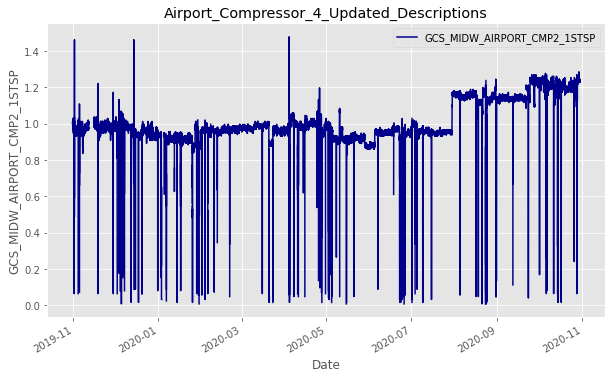

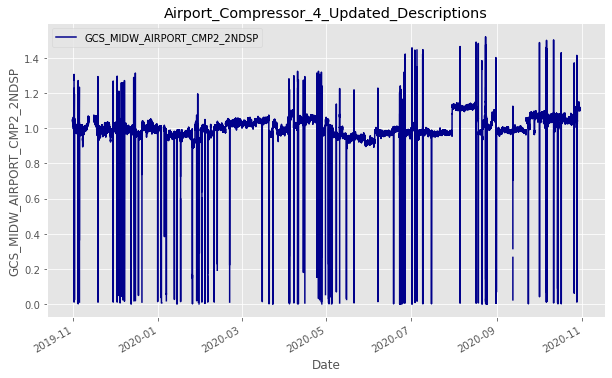

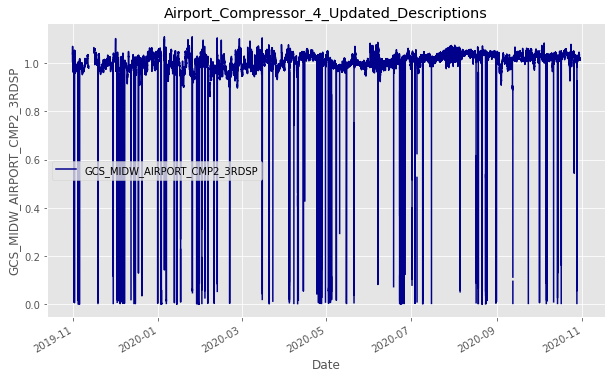

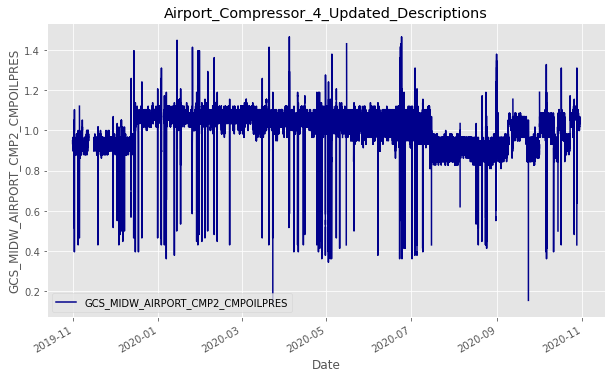

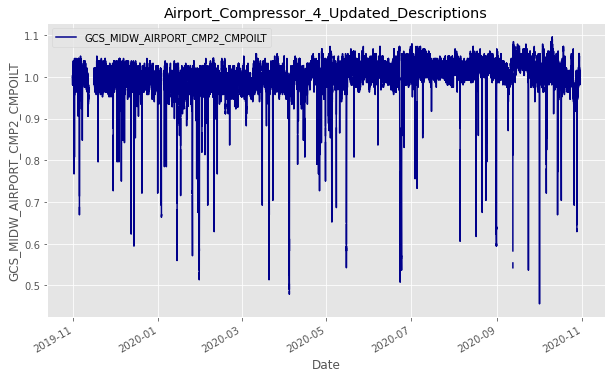

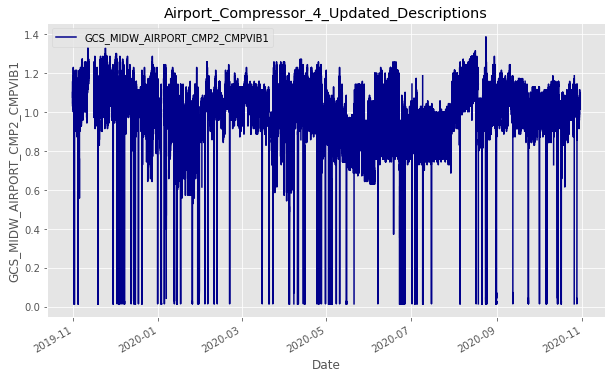

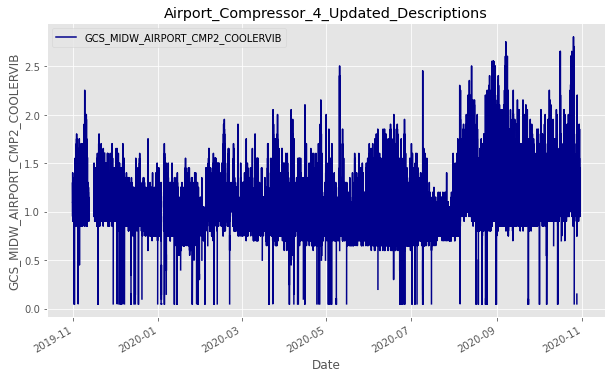

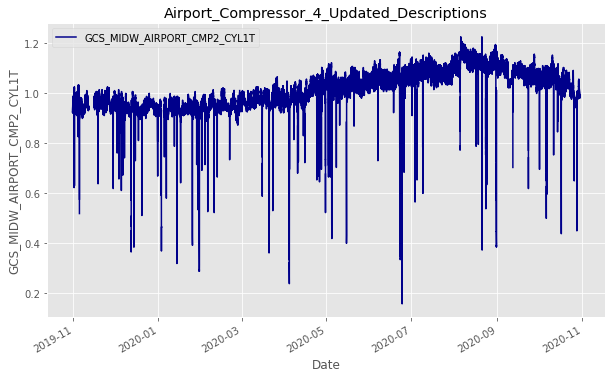

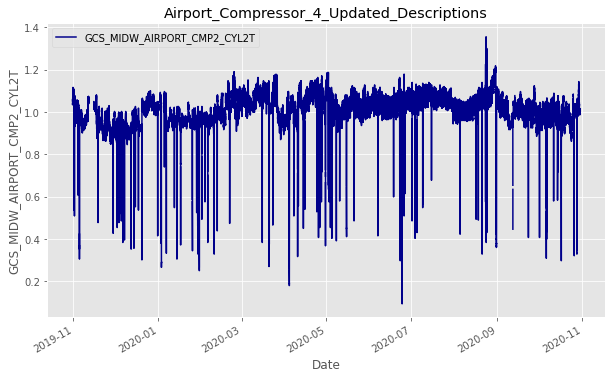

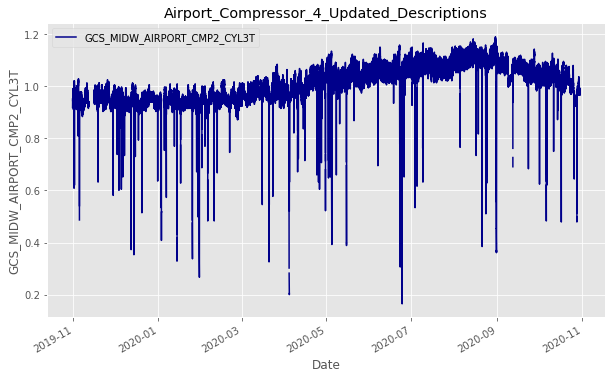

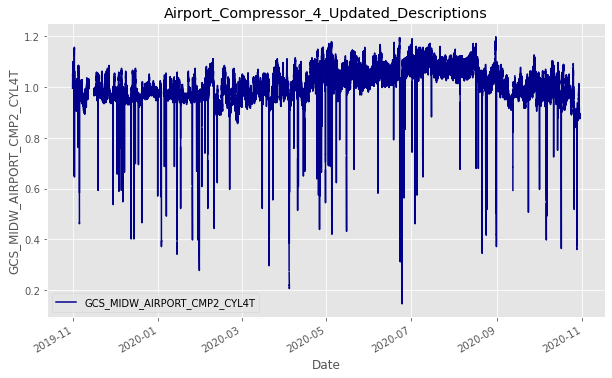

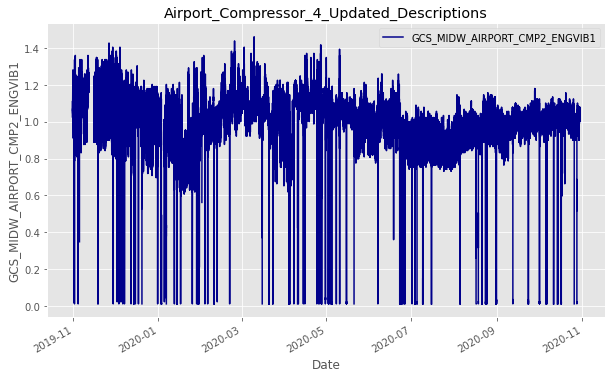

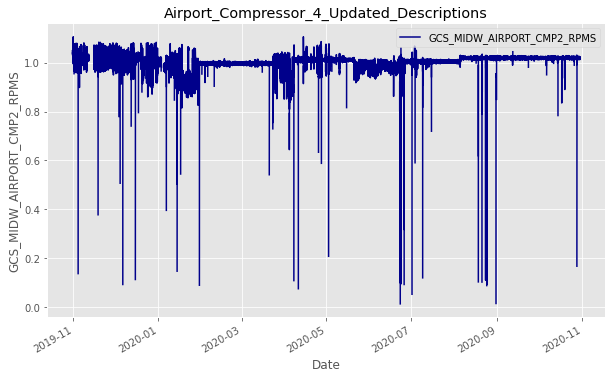

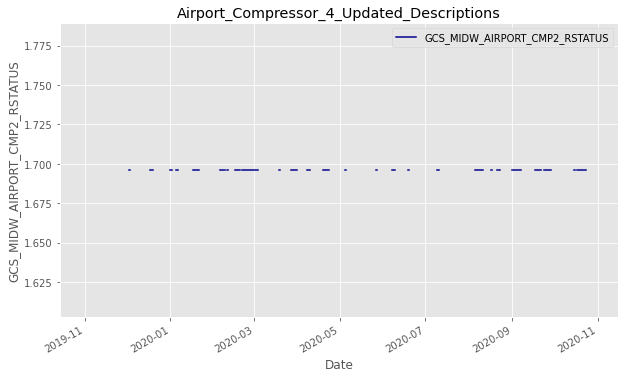

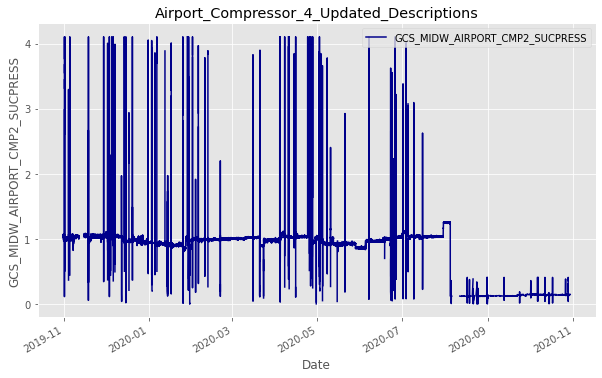

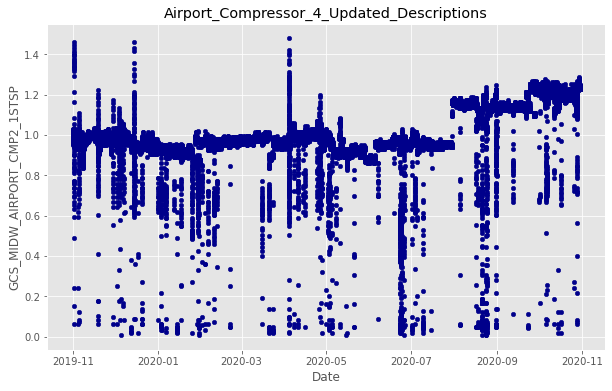

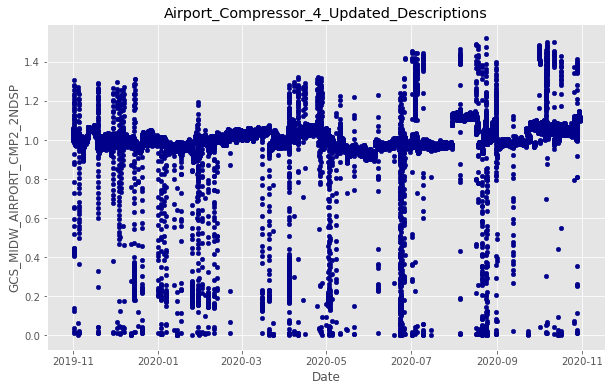

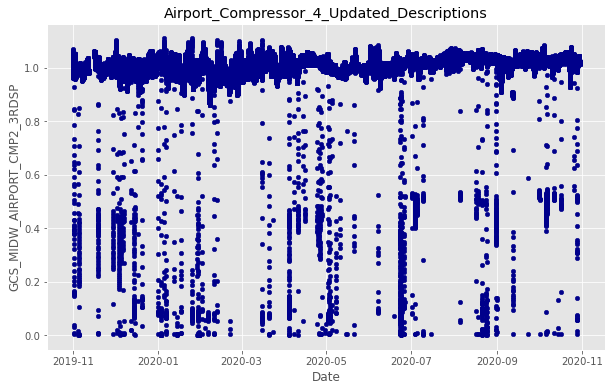

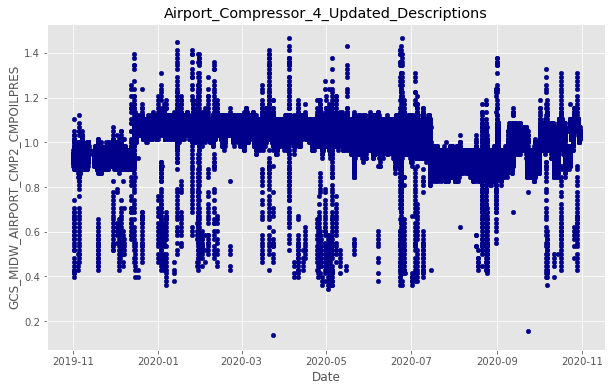

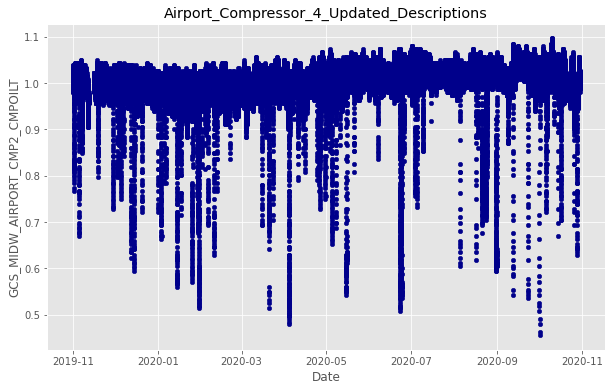

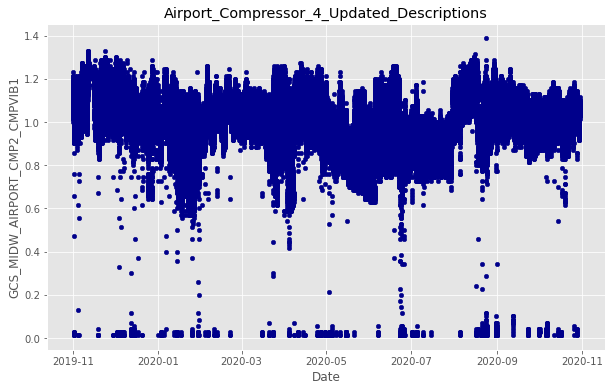

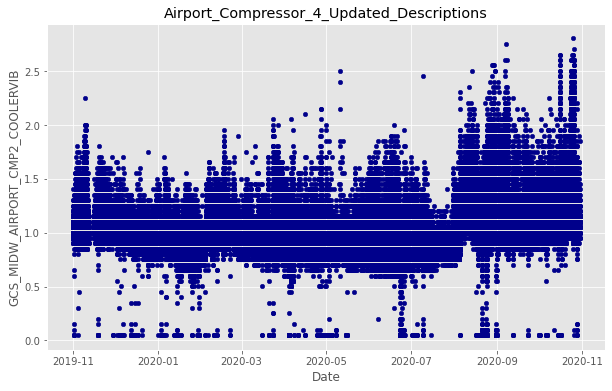

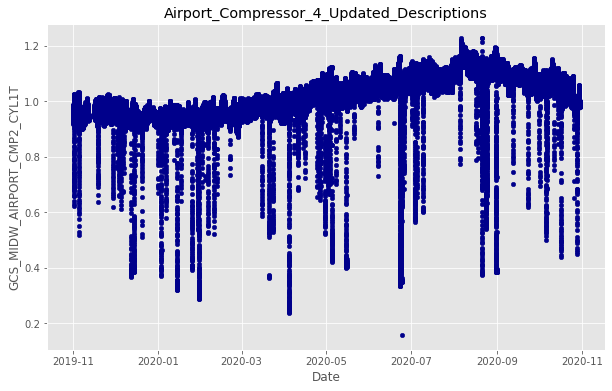

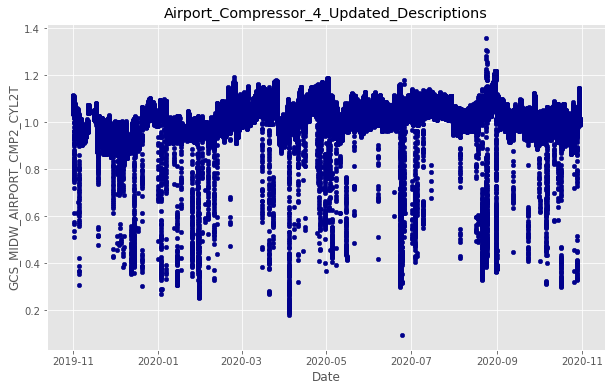

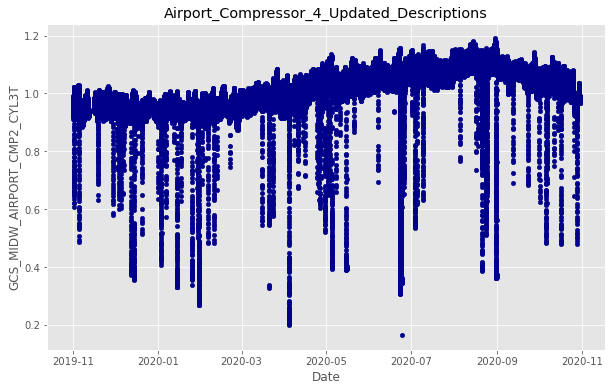

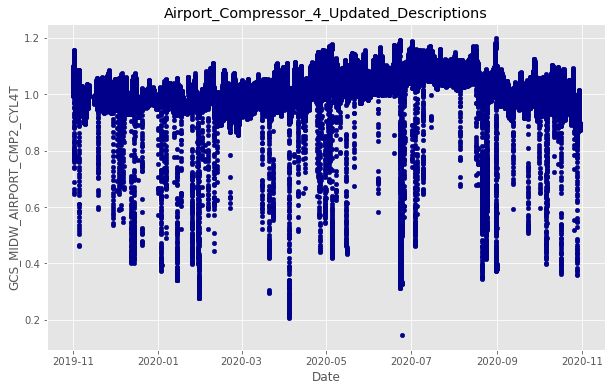

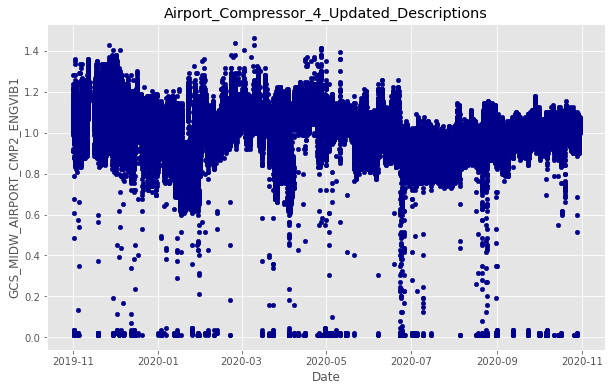

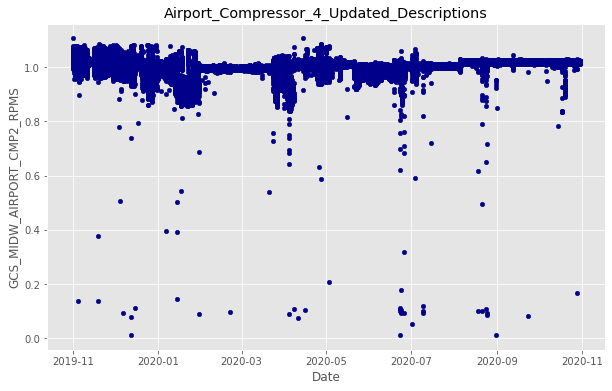

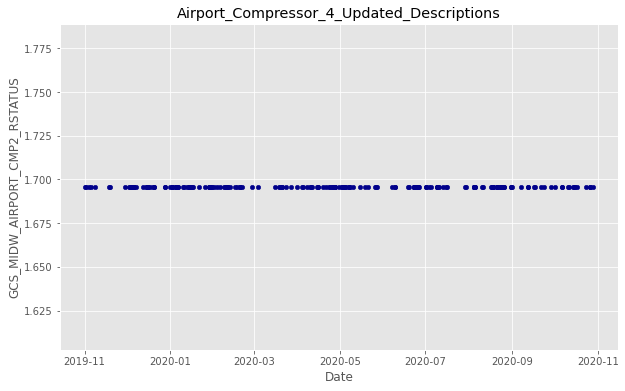

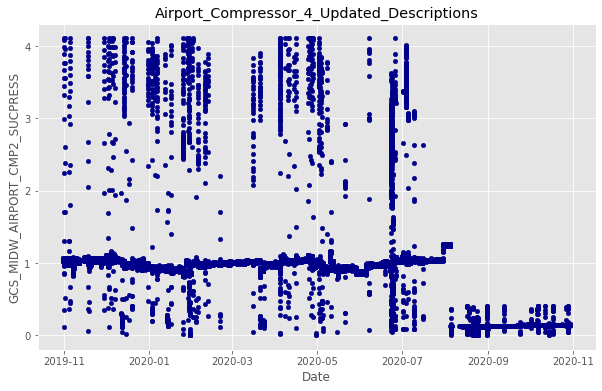

In [25]:
# Plot each signal against its individual time stamp column
n=0
df2_cols=df2.columns
while n < df2.shape[1]:
    df2.plot(kind='line', x= df2_cols[n], y=df2_cols[n+1], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    #plt.ylim(0, 2)
    plt.show()
    n=n+2

n=0
df2_cols=df2.columns
while n < df2.shape[1]:
    df2.plot(kind='scatter', x= df2_cols[n], y=df2_cols[n+1], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    #plt.ylim(0, 2)
    plt.show()
    n=n+2

## Group data by minute

In [26]:
# Make column list
df2_cols=df2.columns

# Make Data Column list
df2_data_cols = []
n=1
while n < df2.shape[1]:
    df2_data_cols.append(df2_cols[n])
    n=n+2
display(df2_data_cols)

# Make Date Column list
df2_date_cols = []
n=0
while n < df2.shape[1]:
    df2_date_cols.append(df2_cols[n])
    n=n+2
display(df2_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [27]:
# Create new dataframe with stacked metrics 
df3 = pd.DataFrame({'DateTime':[], 'Metric':[]})

n=0
for col in df2_data_cols:
    col = pd.DataFrame(df2[df2_cols[n:n+2]])
    col.rename(columns={df2_cols[n]:'DateTime'}, inplace=True)
    #col.rename(columns={df2_cols[n]:'DateTime', df2_cols[n+1]:'Data'}, inplace=True)
    col['Metric'] = df2_cols[n+1]
    display(col)
    df3=pd.concat([df3, col])
    n=n+2
display(df3)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0                      NaT                          NaN   
1      2019-10-31 09:07:27                     0.995917   
2      2019-10-31 09:59:28                     1.003948   
3      2019-10-31 10:01:27                     0.995917   
4      2019-10-31 10:09:27                     1.003948   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_1STSP  
1       GCS_MIDW_AIRPORT_CMP2_1STSP  
2       GCS_MIDW_AIRPORT_CMP2_1STSP  
3       GCS_MIDW_AIRPORT_CMP2_1STSP  
4       GCS_MIDW_AIRPORT_CMP2_1STSP  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_1STSP  
192838  GCS_MIDW_AIRPORT_CMP2_1STSP  
192839  GCS_MIDW_AIRPORT_CMP2_1STSP  
192840  GCS_MIDW_AIRPORT_CMP2_1STSP  
192841  GCS_MIDW_AIRPORT_CMP2_1STSP  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                      NaT                          NaN   
1      2019-10-31 09:47:27                     1.044921   
2      2019-10-31 09:53:27                     1.049945   
3      2019-10-31 09:59:28                     1.044921   
4      2019-10-31 10:01:27                     1.049945   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_2NDSP  
1       GCS_MIDW_AIRPORT_CMP2_2NDSP  
2       GCS_MIDW_AIRPORT_CMP2_2NDSP  
3       GCS_MIDW_AIRPORT_CMP2_2NDSP  
4       GCS_MIDW_AIRPORT_CMP2_2NDSP  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_2NDSP  
192838  GCS_MIDW_AIRPORT_CMP2_2NDSP  
192839  GCS_MIDW_AIRPORT_CMP2_2NDSP  
192840  GCS_MIDW_AIRPORT_CMP2_2NDSP  
192841  GCS_MIDW_AIRPORT_CMP2_2NDSP  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                      NaT                          NaN   
1      2019-10-31 09:49:27                     1.038624   
2      2019-10-31 09:53:27                     1.043253   
3      2019-10-31 09:55:27                     1.045104   
4      2019-10-31 09:59:28                     1.038624   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_3RDSP  
1       GCS_MIDW_AIRPORT_CMP2_3RDSP  
2       GCS_MIDW_AIRPORT_CMP2_3RDSP  
3       GCS_MIDW_AIRPORT_CMP2_3RDSP  
4       GCS_MIDW_AIRPORT_CMP2_3RDSP  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_3RDSP  
192838  GCS_MIDW_AIRPORT_CMP2_3RDSP  
192839  GCS_MIDW_AIRPORT_CMP2_3RDSP  
192840  GCS_MIDW_AIRPORT_CMP2_3RDSP  
192841  GCS_MIDW_AIRPORT_CMP2_3RDSP  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                      NaT                               NaN   
1      2019-10-31 09:51:28                          0.947721   
2      2019-10-31 09:53:27                          0.930490   
3      2019-10-31 09:55:27                          0.947721   
4      2019-10-31 09:57:27                          0.930490   
...                    ...                               ...   
192837                 NaT                               NaN   
192838                 NaT                               NaN   
192839                 NaT                               NaN   
192840                 NaT                               NaN   
192841                 NaT                               NaN   

                                  Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
...                                  ...  
192837  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
192838  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
192839  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
192840  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
192841  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                      NaT                            NaN   
1      2019-10-31 09:49:27                       0.998341   
2      2019-10-31 09:55:27                       0.992570   
3      2019-10-31 09:57:27                       0.998341   
4      2019-10-31 09:59:28                       0.992570   
...                    ...                            ...   
192837                 NaT                            NaN   
192838                 NaT                            NaN   
192839                 NaT                            NaN   
192840                 NaT                            NaN   
192841                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
...                               ...  
192837  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
192838  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
192839  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
192840  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
192841  GCS_MIDW_AIRPORT_CMP2_CMPOILT  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                      NaT                            NaN   
1      2019-10-31 09:51:28                       1.100869   
2      2019-10-31 09:53:27                       1.072275   
3      2019-10-31 09:55:27                       1.057978   
4      2019-10-31 09:57:27                       1.115166   
...                    ...                            ...   
192837                 NaT                            NaN   
192838                 NaT                            NaN   
192839                 NaT                            NaN   
192840                 NaT                            NaN   
192841                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
1       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
2       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
3       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
4       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
...                               ...  
192837  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
192838  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
192839  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
192840  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
192841  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                      NaT                              NaN   
1      2019-10-31 09:45:27                         1.101538   
2      2019-10-31 09:55:27                         1.251748   
3      2019-10-31 09:57:27                         1.101538   
4      2019-10-31 09:59:28                         1.051468   
...                    ...                              ...   
192837                 NaT                              NaN   
192838                 NaT                              NaN   
192839                 NaT                              NaN   
192840                 NaT                              NaN   
192841                 NaT                              NaN   

                                 Metric  
0       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
1       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
2       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
3       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
4       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
...                                 ...  
192837  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
192838  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
192839  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
192840  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
192841  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                      NaT                          NaN   
1      2019-10-31 09:51:28                     0.925900   
2      2019-10-31 09:53:27                     0.922058   
3      2019-10-31 09:55:27                     0.925900   
4      2019-10-31 09:57:27                     0.929742   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL1T  
1       GCS_MIDW_AIRPORT_CMP2_CYL1T  
2       GCS_MIDW_AIRPORT_CMP2_CYL1T  
3       GCS_MIDW_AIRPORT_CMP2_CYL1T  
4       GCS_MIDW_AIRPORT_CMP2_CYL1T  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_CYL1T  
192838  GCS_MIDW_AIRPORT_CMP2_CYL1T  
192839  GCS_MIDW_AIRPORT_CMP2_CYL1T  
192840  GCS_MIDW_AIRPORT_CMP2_CYL1T  
192841  GCS_MIDW_AIRPORT_CMP2_CYL1T  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                      NaT                          NaN   
1      2019-10-31 09:51:28                     1.038070   
2      2019-10-31 09:57:27                     1.034152   
3      2019-10-31 09:59:28                     1.041987   
4      2019-10-31 10:01:27                     1.038070   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL2T  
1       GCS_MIDW_AIRPORT_CMP2_CYL2T  
2       GCS_MIDW_AIRPORT_CMP2_CYL2T  
3       GCS_MIDW_AIRPORT_CMP2_CYL2T  
4       GCS_MIDW_AIRPORT_CMP2_CYL2T  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_CYL2T  
192838  GCS_MIDW_AIRPORT_CMP2_CYL2T  
192839  GCS_MIDW_AIRPORT_CMP2_CYL2T  
192840  GCS_MIDW_AIRPORT_CMP2_CYL2T  
192841  GCS_MIDW_AIRPORT_CMP2_CYL2T  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                      NaT                          NaN   
1      2019-10-31 09:51:28                     0.918828   
2      2019-10-31 09:53:27                     0.922754   
3      2019-10-31 09:55:27                     0.926681   
4      2019-10-31 09:57:27                     0.930608   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL3T  
1       GCS_MIDW_AIRPORT_CMP2_CYL3T  
2       GCS_MIDW_AIRPORT_CMP2_CYL3T  
3       GCS_MIDW_AIRPORT_CMP2_CYL3T  
4       GCS_MIDW_AIRPORT_CMP2_CYL3T  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_CYL3T  
192838  GCS_MIDW_AIRPORT_CMP2_CYL3T  
192839  GCS_MIDW_AIRPORT_CMP2_CYL3T  
192840  GCS_MIDW_AIRPORT_CMP2_CYL3T  
192841  GCS_MIDW_AIRPORT_CMP2_CYL3T  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
0                      NaT                          NaN   
1      2019-10-31 09:51:28                     0.995284   
2      2019-10-31 09:53:27                     0.999040   
3      2019-10-31 09:55:27                     1.002796   
4      2019-10-31 09:57:27                     0.995284   
...                    ...                          ...   
192837                 NaT                          NaN   
192838                 NaT                          NaN   
192839                 NaT                          NaN   
192840                 NaT                          NaN   
192841                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL4T  
1       GCS_MIDW_AIRPORT_CMP2_CYL4T  
2       GCS_MIDW_AIRPORT_CMP2_CYL4T  
3       GCS_MIDW_AIRPORT_CMP2_CYL4T  
4       GCS_MIDW_AIRPORT_CMP2_CYL4T  
...                             ...  
192837  GCS_MIDW_AIRPORT_CMP2_CYL4T  
192838  GCS_MIDW_AIRPORT_CMP2_CYL4T  
192839  GCS_MIDW_AIRPORT_CMP2_CYL4T  
192840  GCS_MIDW_AIRPORT_CMP2_CYL4T  
192841  GCS_MIDW_AIRPORT_CMP2_CYL4T  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0                      NaT                            NaN   
1      2019-10-31 09:47:27                       1.067647   
2      2019-10-31 09:53:27                       1.056409   
3      2019-10-31 09:55:27                       1.067647   
4      2019-10-31 09:57:27                       1.045170   
...                    ...                            ...   
192837                 NaT                            NaN   
192838                 NaT                            NaN   
192839                 NaT                            NaN   
192840                 NaT                            NaN   
192841                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
1       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
2       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
3       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
4       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
...                               ...  
192837  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
192838  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
192839  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
192840  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
192841  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RPMS  \
0                      NaT                         NaN   
1      2019-10-31 09:51:28                    1.039596   
2      2019-10-31 09:53:27                    1.038840   
3      2019-10-31 09:55:27                    1.044129   
4      2019-10-31 09:57:27                    1.038840   
...                    ...                         ...   
192837 2020-10-30 09:35:33                    1.018441   
192838 2020-10-30 09:41:36                    1.021463   
192839 2020-10-30 09:43:32                    1.016175   
192840 2020-10-30 09:45:32                    1.017686   
192841 2020-10-30 09:53:41                    1.021463   

                            Metric  
0       GCS_MIDW_AIRPORT_CMP2_RPMS  
1       GCS_MIDW_AIRPORT_CMP2_RPMS  
2       GCS_MIDW_AIRPORT_CMP2_RPMS  
3       GCS_MIDW_AIRPORT_CMP2_RPMS  
4       GCS_MIDW_AIRPORT_CMP2_RPMS  
...                            ...  
192837  GCS_MIDW_AIRPORT_CMP2_RPMS  
192838  GCS_MIDW_AIRPORT_CMP2_RPMS  
192839  GCS_MIDW_AIRPORT_CMP2_RPMS  
192840  GCS_MIDW_AIRPORT_CMP2_RPMS  
192841  GCS_MIDW_AIRPORT_CMP2_RPMS  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0                      NaT                            NaN   
1      2019-11-01 10:57:28                            NaN   
2      2019-11-01 11:45:26                       1.695853   
3      2019-11-01 17:17:27                            NaN   
4      2019-11-01 18:31:26                       1.695853   
...                    ...                            ...   
192837                 NaT                            NaN   
192838                 NaT                            NaN   
192839                 NaT                            NaN   
192840                 NaT                            NaN   
192841                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
1       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
2       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
3       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
4       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
...                               ...  
192837  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
192838  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
192839  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
192840  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
192841  GCS_MIDW_AIRPORT_CMP2_RSTATUS  

[192842 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  \
0                      NaT                             NaN   
1      2019-10-31 09:51:28                        1.046622   
2      2019-10-31 09:53:27                        1.054831   
3      2019-10-31 09:55:27                        1.046622   
4      2019-10-31 09:57:27                        1.054831   
...                    ...                             ...   
192837                 NaT                             NaN   
192838                 NaT                             NaN   
192839                 NaT                             NaN   
192840                 NaT                             NaN   
192841                 NaT                             NaN   

                                Metric  
0       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
1       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
2       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
3       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
4       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
...                                ...  
192837  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
192838  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
192839  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
192840  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
192841  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  

[192842 rows x 3 columns]

DateTime                          Metric  \
0                      NaT     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:07:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:59:28     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:01:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:09:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
192837                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192838                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192839                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192840                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192841                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                               NaN                          NaN   
1                          0.995917                          NaN   
2                          1.003948                          NaN   
3                          0.995917                          NaN   
4                          1.003948                          NaN   
...                             ...                          ...   
192837                          NaN                          NaN   
192838                          NaN                          NaN   
192839                          NaN                          NaN   
192840                          NaN                          NaN   
192841                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
192837                          NaN                               NaN   
192838                          NaN                               NaN   
192839                          NaN                               NaN   
192840                          NaN                               NaN   
192841                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
192837                            NaN                            NaN   
192838                            NaN                            NaN   
192839                            NaN                            NaN   
192840                            NaN                            NaN   
192841                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
192837                              NaN                          NaN   
192838                              NaN                          NaN   
192839                              NaN                          N

In [28]:
# Round datetime to nearest minute
df3['DateTime'] = df3['DateTime'].values.astype('<M8[m]')
display(df3)

DateTime                          Metric  \
0                      NaT     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:59:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:01:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:09:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
192837                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192838                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192839                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192840                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
192841                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                               NaN                          NaN   
1                          0.995917                          NaN   
2                          1.003948                          NaN   
3                          0.995917                          NaN   
4                          1.003948                          NaN   
...                             ...                          ...   
192837                          NaN                          NaN   
192838                          NaN                          NaN   
192839                          NaN                          NaN   
192840                          NaN                          NaN   
192841                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
192837                          NaN                               NaN   
192838                          NaN                               NaN   
192839                          NaN                               NaN   
192840                          NaN                               NaN   
192841                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
192837                            NaN                            NaN   
192838                            NaN                            NaN   
192839                            NaN                            NaN   
192840                            NaN                            NaN   
192841                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
192837                              NaN                          NaN   
192838                              NaN                          NaN   
192839                              NaN                          N

In [29]:
df3.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 81010.000000                140041.000000   
mean                      1.001234                     1.000536   
std                       0.130519                     0.094884   
min                       0.008032                     0.002512   
25%                       0.947727                     0.974590   
50%                       0.971822                     0.997197   
75%                       1.100328                     1.037386   
max                       1.477812                     1.519657   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138174.000000                     125189.000000   
mean                      1.001267                          1.000351   
std                       0.093720                          0.082151   
min                       0.000926                          0.137850   
25%                       0.994191                          0.930490   
50%                       1.014556                          1.033878   
75%                       1.031219                          1.051109   
max                       1.109903                          1.464660   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                   97975.000000                  156341.000000   
mean                        0.996306                       1.000915   
std                         0.051399                       0.142028   
min                         0.455890                       0.014297   
25%                         0.986799                       0.943602   
50%                         1.004112                       1.029384   
75%                         1.021424                       1.086572   
max                         1.096444                       1.386810   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    151964.000000                113005.000000   
mean                          1.003698                     1.000072   
std                           0.210243                     0.090377   
min                           0.050070                     0.157518   
25%                           0.901259                     0.948951   
50%                           0.951329                     0.995054   
75%                           1.101538                     1.060367   
max                           2.803916                     1.225569   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                127700.000000                144316.000000   
mean                      1.000117                     1.000104   
std                       0.092978                     0.083360   
min                       0.094014                     0.164918   
25%                       0.963642                     0.950241   
50%                       1.010649                     0.997360   
75%                       1.049821                     1.060186   
max                       1.355366                     1.189764   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                129641.000000                  160379.000000   
mean                      1.000116                       1.000929   
std                       0.085473                       0.135930   
min                       0.146476                       0.011238   
25%                       0.965238                       0.932786   
50%                       0.999040                       1.022693   
75%                       1.051621                       1.078885   
max                       1.198097                       1.460991   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               190599.000000                   2.170000e+02   
mean                     1.001081                   1.695853e+00   
std                      0.029693           

In [30]:
# Drop rows without datetime data
df3.dropna(subset=['DateTime'], inplace=True)
display(df3)

DateTime                          Metric  \
1     2019-10-31 09:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2     2019-10-31 09:59:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3     2019-10-31 10:01:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4     2019-10-31 10:09:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
5     2019-10-31 10:15:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                   ...                             ...   
79022 2020-10-29 16:17:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
79023 2020-10-29 16:25:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
79024 2020-10-29 16:29:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
79025 2020-10-29 16:35:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
79026 2020-10-29 16:43:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

       GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
1                         0.995917                          NaN   
2                         1.003948                          NaN   
3                         0.995917                          NaN   
4                         1.003948                          NaN   
5                         0.995917                          NaN   
...                            ...                          ...   
79022                          NaN                          NaN   
79023                          NaN                          NaN   
79024                          NaN                          NaN   
79025                          NaN                          NaN   
79026                          NaN                          NaN   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
5                              NaN                               NaN   
...                            ...                               ...   
79022                          NaN                               NaN   
79023                          NaN                               NaN   
79024                          NaN                               NaN   
79025                          NaN                               NaN   
79026                          NaN                               NaN   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
5                                NaN                            NaN   
...                              ...                            ...   
79022                            NaN                            NaN   
79023                            NaN                            NaN   
79024                            NaN                            NaN   
79025                            NaN                            NaN   
79026                            NaN                            NaN   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
5                                  NaN                          NaN   
...                                ...                          ...   
79022                              NaN                          NaN   
79023                              NaN                          NaN   
79024                              NaN                          NaN   
79025                              NaN             

In [31]:
# Group by datetime to nearest minute
df_min = df3.groupby(['DateTime'], as_index=False).mean()
display(df_min)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0      2019-10-31 09:07:00                     0.995917   
1      2019-10-31 09:45:00                          NaN   
2      2019-10-31 09:47:00                          NaN   
3      2019-10-31 09:49:00                          NaN   
4      2019-10-31 09:51:00                          NaN   
...                    ...                          ...   
217187 2020-10-30 09:41:00                          NaN   
217188 2020-10-30 09:43:00                     1.244896   
217189 2020-10-30 09:45:00                     1.236865   
217190 2020-10-30 09:53:00                          NaN   
217191 2020-10-30 09:55:00                          NaN   

        GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                          1.044921                          NaN   
3                               NaN                     1.038624   
4                               NaN                          NaN   
...                             ...                          ...   
217187                          NaN                          NaN   
217188                     1.115253                          NaN   
217189                     1.110229                     1.017334   
217190                          NaN                     1.012705   
217191                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                                    NaN                       0.998341   
4                               0.947721                            NaN   
...                                  ...                            ...   
217187                               NaN                            NaN   
217188                          1.033878                            NaN   
217189                               NaN                       1.004112   
217190                          1.051109                            NaN   
217191                               NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                                 NaN                              NaN   
1                                 NaN                         1.101538   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                            1.100869                              NaN   
...                               ...                              ...   
217187                            NaN                         1.001398   
217188                       1.029384                              NaN   
217189                       1.043681                         1.051468   
217190                       1.015087                              NaN   
217191                            NaN                         1.101538   

        GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                          0.925900                     1.038070   
...                             ...                          ...   
217187                     0.995054                          NaN   
217188                          NaN                          NaN   
217189                          NaN                     1.006732   
217190                

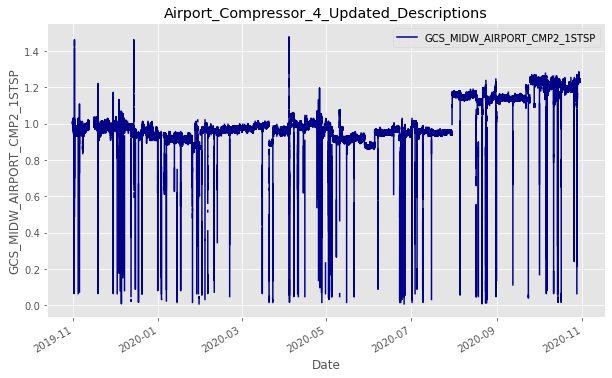

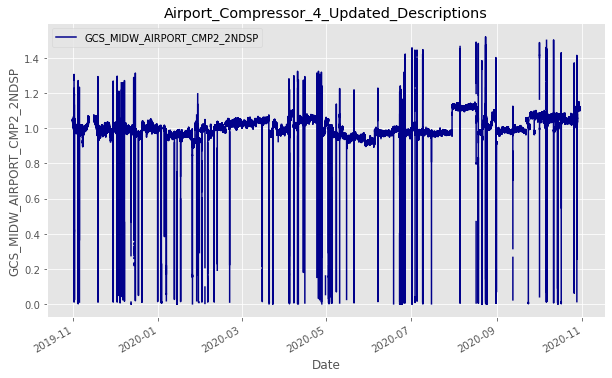

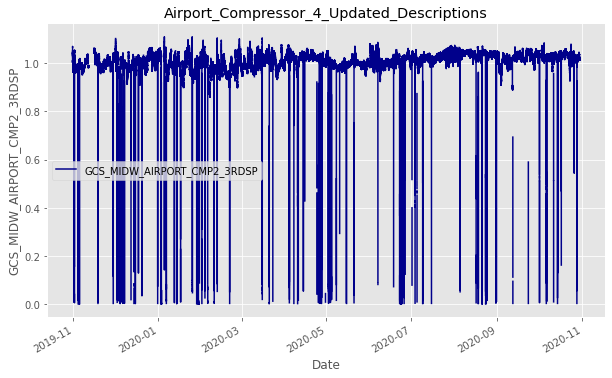

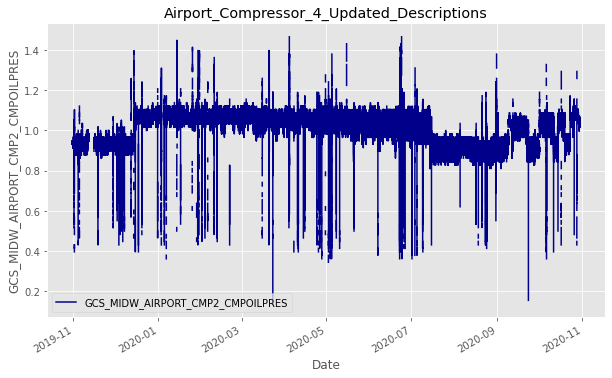

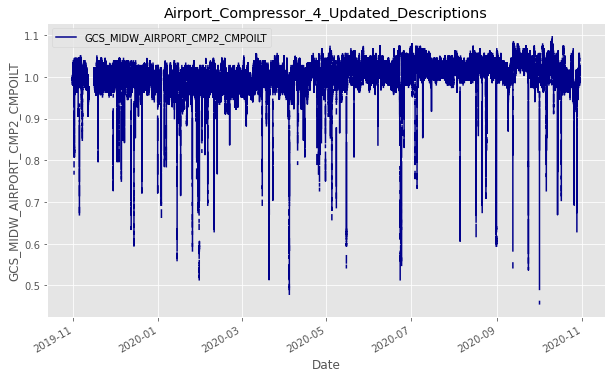

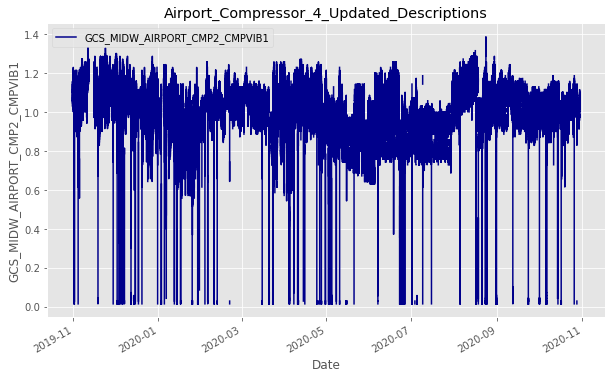

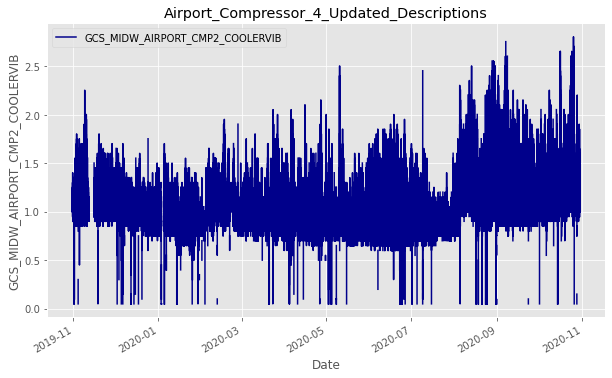

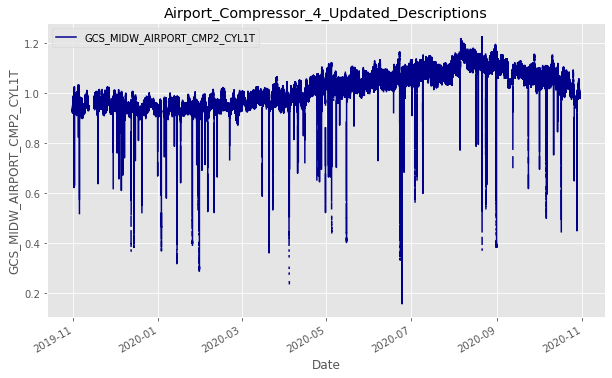

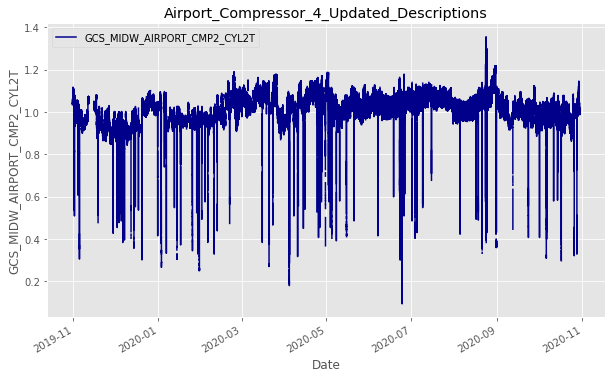

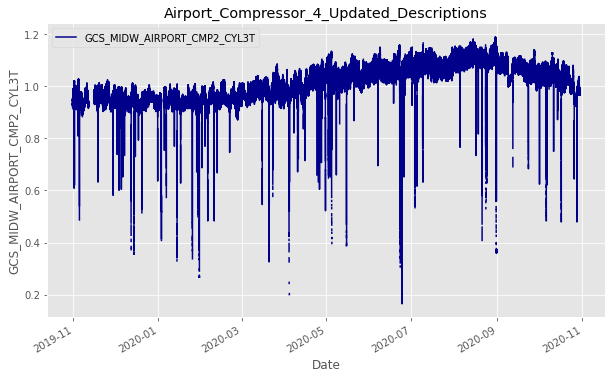

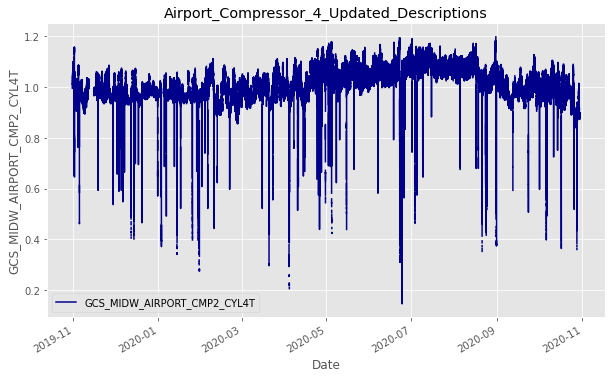

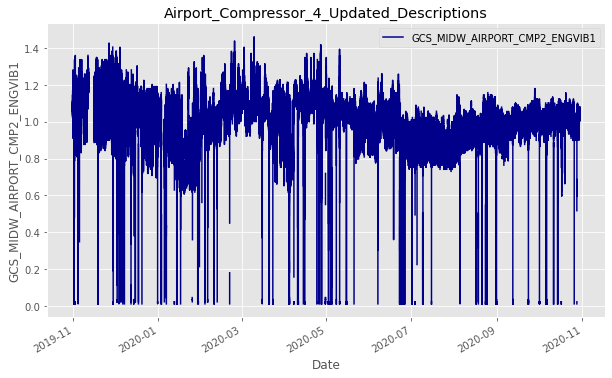

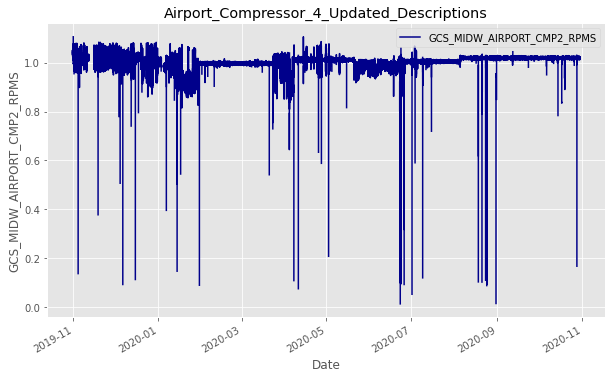

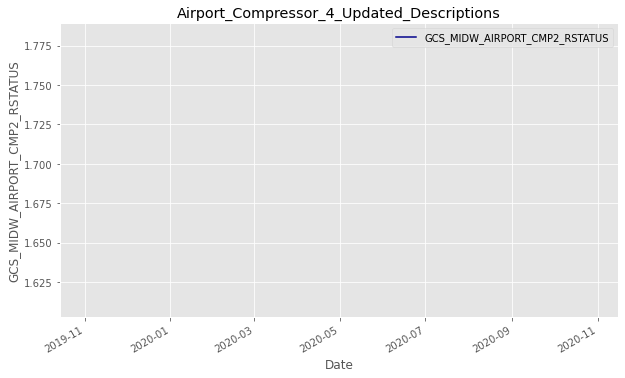

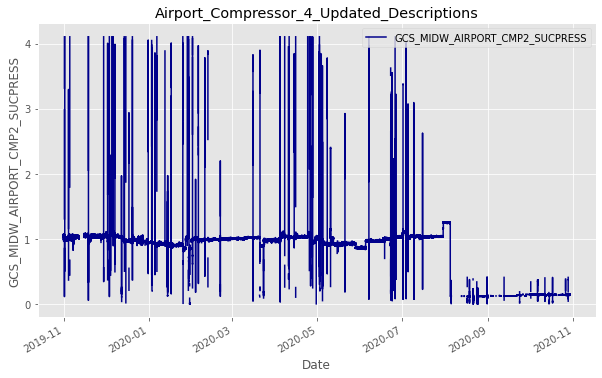

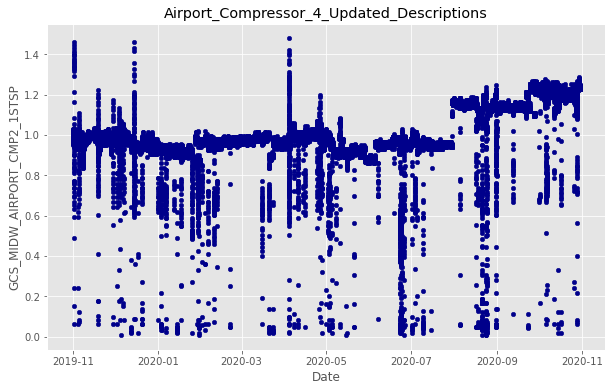

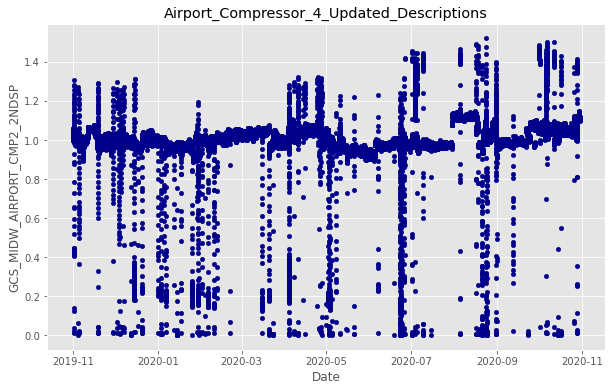

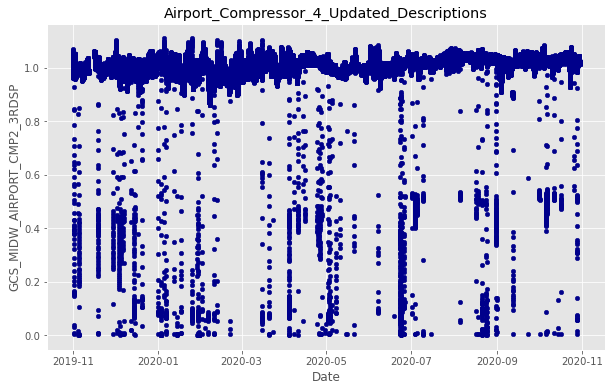

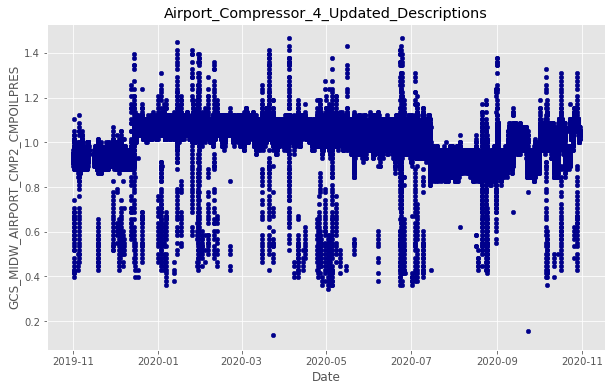

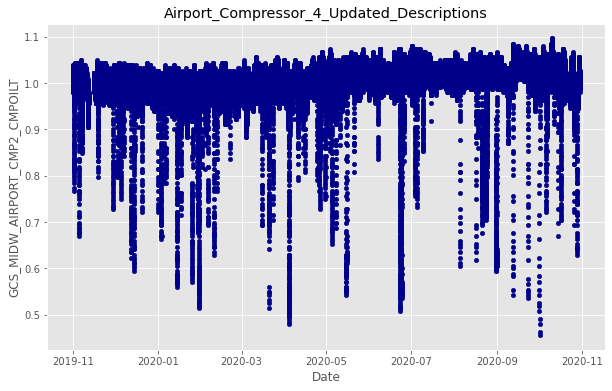

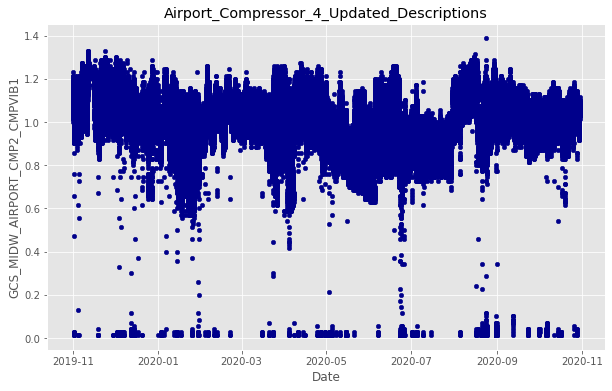

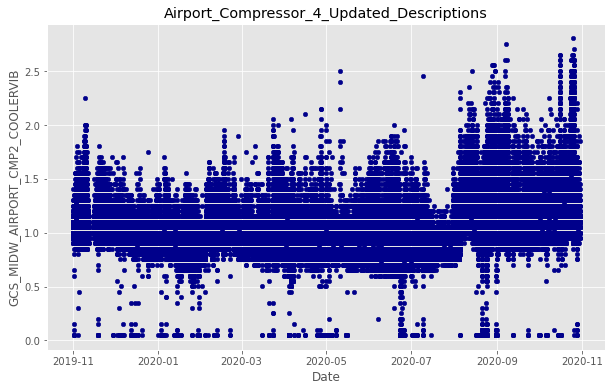

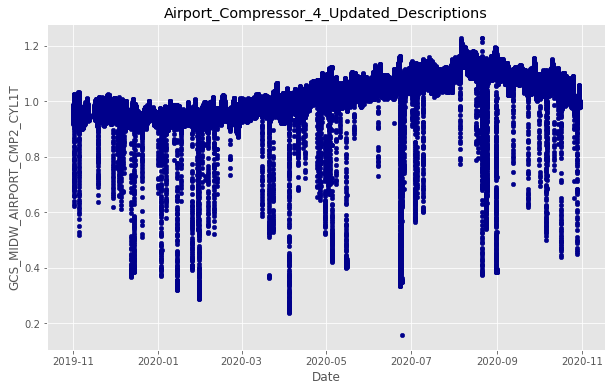

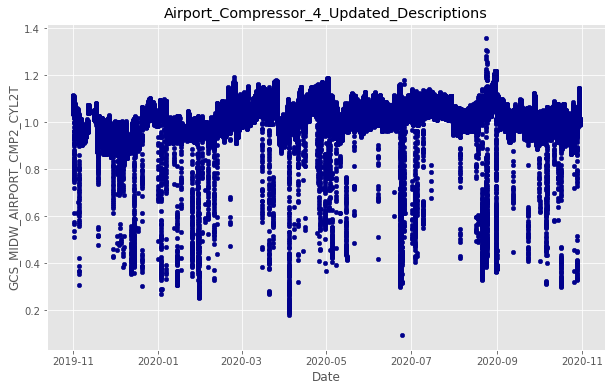

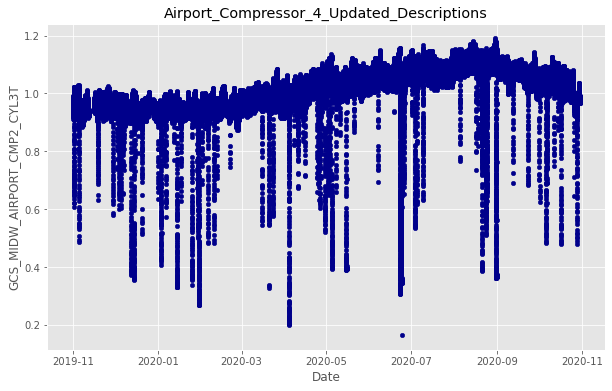

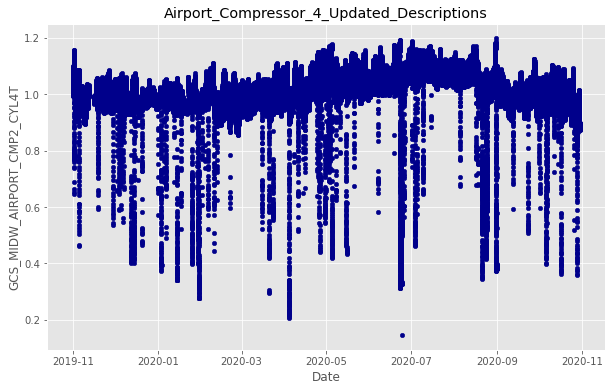

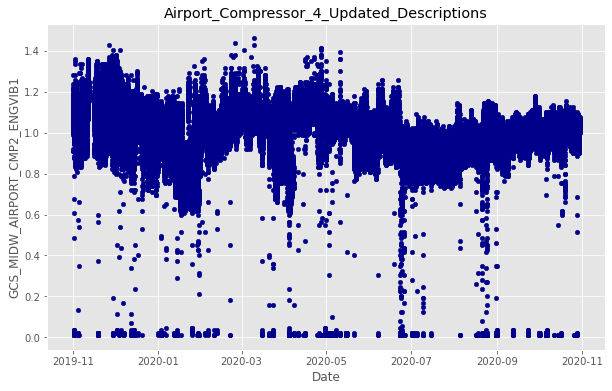

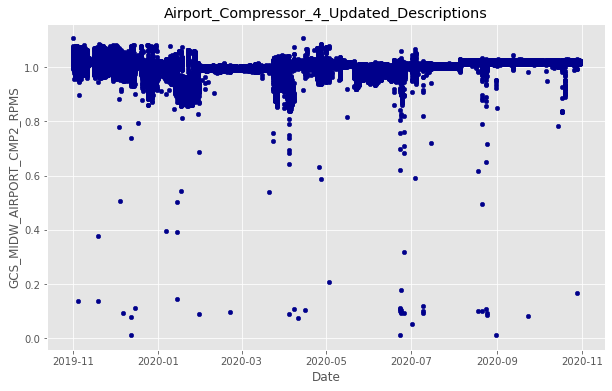

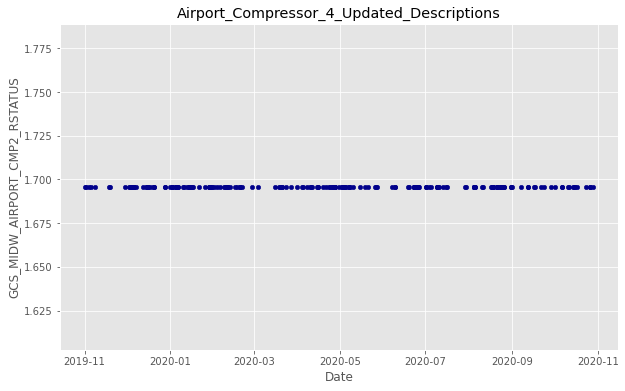

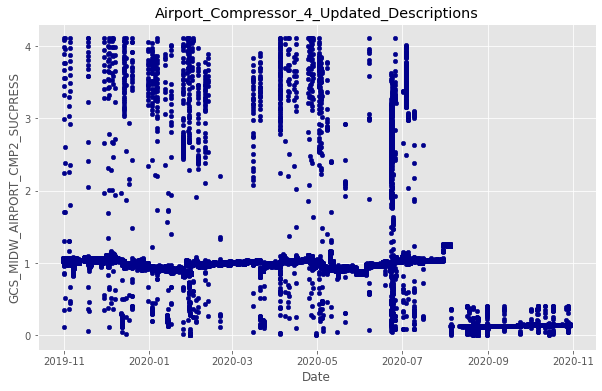

In [32]:
n=1
df_min_cols=df_min.columns
while n < df_min.shape[1]:
    df_min.plot(kind='line', x= df_min_cols[0], y=df_min_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_min_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_min_cols=df_min.columns
while n < df_min.shape[1]:
    df_min.plot(kind='scatter', x= df_min_cols[0], y=df_min_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_min_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Group by hour

In [33]:
# Group by datetime to nearest hour
df_hour = df_min.copy(deep=True)
df_hour['DateTime'] = df_hour['DateTime'].dt.round('H')
df_hour = df_hour.groupby(['DateTime'], as_index=False).mean()
display(df_hour.describe())
display(df_hour)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                  8444.000000                  8568.000000   
mean                      1.001190                     0.997217   
std                       0.124154                     0.093082   
min                       0.016063                     0.002512   
25%                       0.943712                     0.973166   
50%                       0.970484                     0.995128   
75%                       1.075006                     1.035990   
max                       1.305936                     1.415137   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                  8552.000000                       8535.000000   
mean                      0.997026                          1.005890   
std                       0.092356                          0.075119   
min                       0.000926                          0.439398   
25%                       0.990257                          0.931815   
50%                       1.012705                          1.035108   
75%                       1.030235                          1.059725   
max                       1.087532                          1.290433   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                    8602.000000                    8578.000000   
mean                        0.998689                       0.987849   
std                         0.049109                       0.154057   
min                         0.500613                       0.014297   
25%                         0.986479                       0.934309   
50%                         1.005348                       1.015087   
75%                         1.022386                       1.085124   
max                         1.087211                       1.296055   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                      8584.000000                  8603.000000   
mean                          0.981979                     1.007786   
std                           0.178015                     0.088901   
min                           0.050070                     0.253566   
25%                           0.884569                     0.952793   
50%                           0.971356                     1.011382   
75%                           1.077976                     1.067381   
max                           2.263876                     1.217885   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                  8604.000000                  8605.000000   
mean                      1.001065                     1.004247   
std                       0.090289                     0.085716   
min                       0.203261                     0.217927   
25%                       0.964356                     0.951222   
50%                       1.010910                     1.009967   
75%                       1.050940                     1.062640   
max                       1.216304                     1.181911   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                  8603.000000                    8581.000000   
mean                      1.003717                       0.988913   
std                       0.085623                       0.149107   
min                       0.227225                       0.011238   
25%                       0.965637                       0.931181   
50%                       1.003478                       1.017074   
75%                       1.054474                       1.073940   
max                       1.176605                       1.313821   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                 8519.000000                   1.940000e+02   
mean                     1.000310                   1.695853e+00   
std                      0.029231           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0    2019-10-31 09:00:00                     0.995917   
1    2019-10-31 10:00:00                     0.999933   
2    2019-10-31 11:00:00                     1.004522   
3    2019-10-31 12:00:00                     1.006783   
4    2019-10-31 13:00:00                     1.006062   
...                  ...                          ...   
8606 2020-10-30 06:00:00                     1.232849   
8607 2020-10-30 07:00:00                     1.232275   
8608 2020-10-30 08:00:00                     1.232540   
8609 2020-10-30 09:00:00                     1.233214   
8610 2020-10-30 10:00:00                     1.236865   

      GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                             NaN                          NaN   
1                        1.046177                     1.040939   
2                        1.045460                     1.027701   
3                        1.042095                     1.021865   
4                        1.033116                     0.986608   
...                           ...                          ...   
8606                     1.110020                     1.019802   
8607                     1.106461                     1.021321   
8608                     1.108471                     1.020512   
8609                     1.109332                     1.019267   
8610                     1.110229                     1.017334   

      GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                  NaN                            NaN   
1                             0.939106                       0.993014   
2                             0.939106                       0.994879   
3                             0.939768                       0.995456   
4                             0.939106                       0.990967   
...                                ...                            ...   
8606                          1.043724                       1.014211   
8607                          1.042493                       1.008234   
8608                          1.045626                       0.993807   
8609                          1.042493                       1.000024   
8610                          1.042493                       1.009883   

      GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                               NaN                              NaN   
1                          1.078295                         1.118228   
2                          1.079424                         1.057359   
3                          1.078630                         1.047114   
4                          1.094271                         1.063986   
...                             ...                              ...   
8606                       1.072275                         1.143905   
8607                       1.062377                         1.169280   
8608                       1.071680                         1.089021   
8609                       1.062744                         1.018088   
8610                       1.038916                         1.093193   

      GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                             NaN                          NaN   
1                        0.928061                     1.040355   
2                        0.934940                     1.050082   
3                        0.941054                     1.055388   
4                        0.952095                     1.059614   
...                           ...                          ...   
8606                     0.990786                     1.006430   
8607                     0.987370                     1.001390   
8608                     0.987851                     0.995884   
8609                     0.987370                     0.998897   
8610                     0.993133                     1.010649   

   

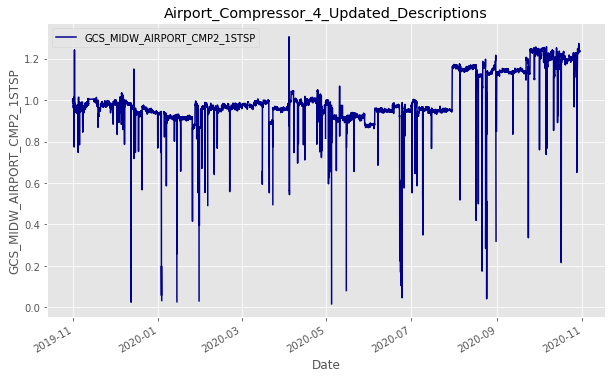

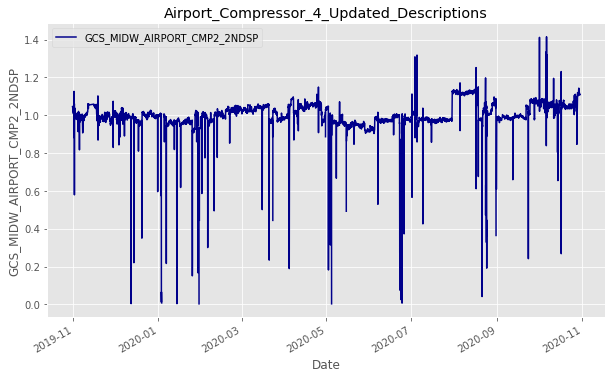

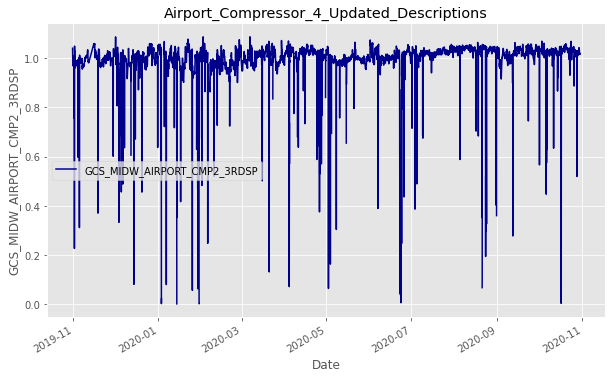

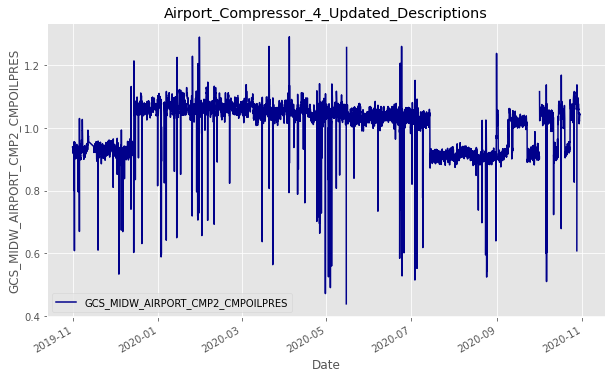

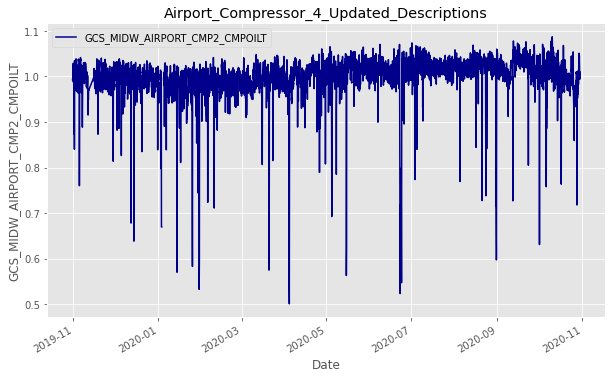

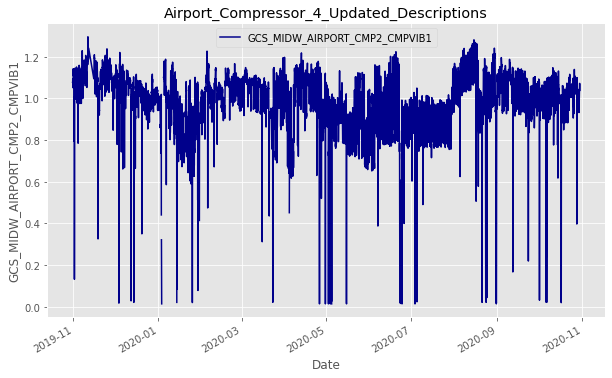

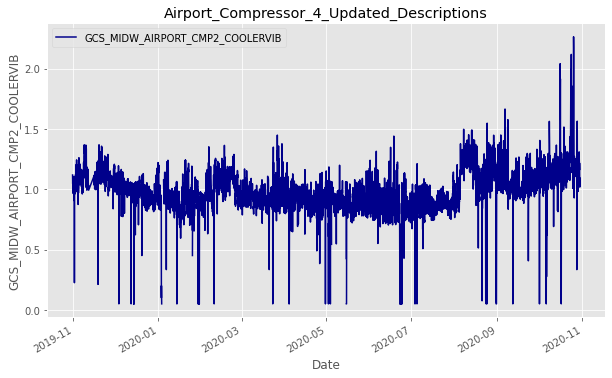

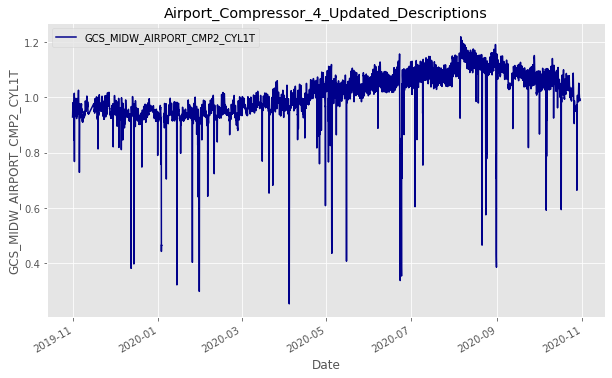

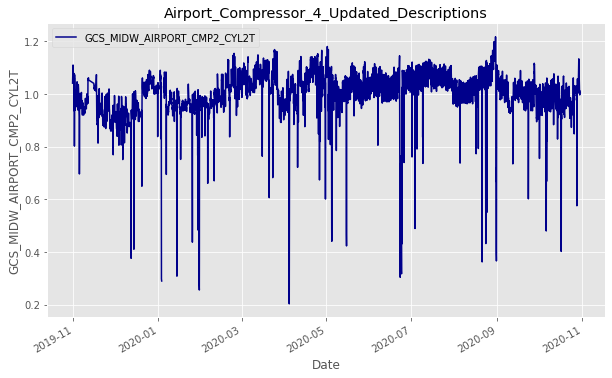

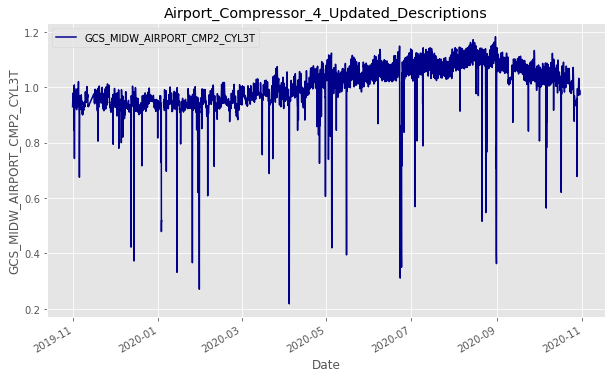

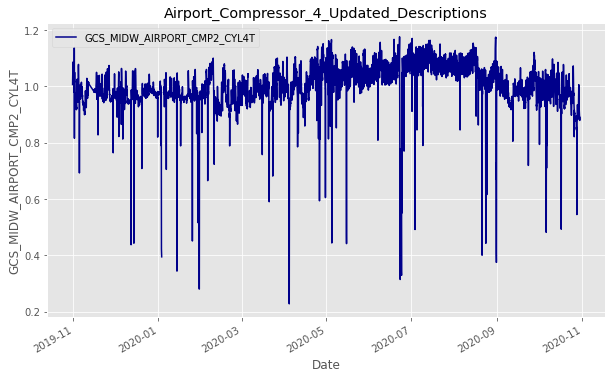

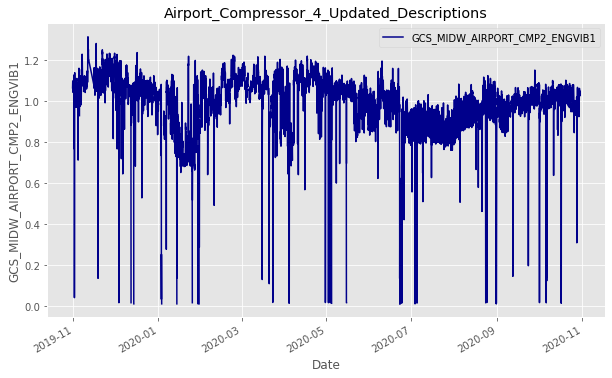

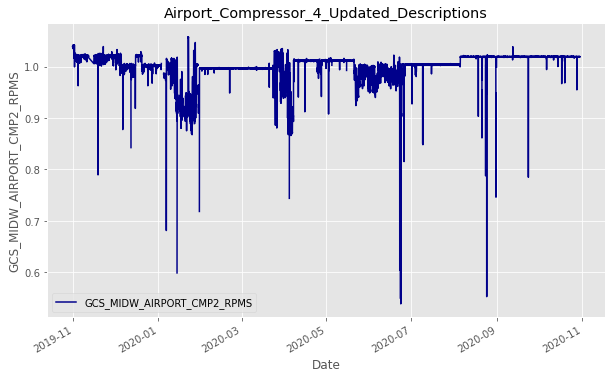

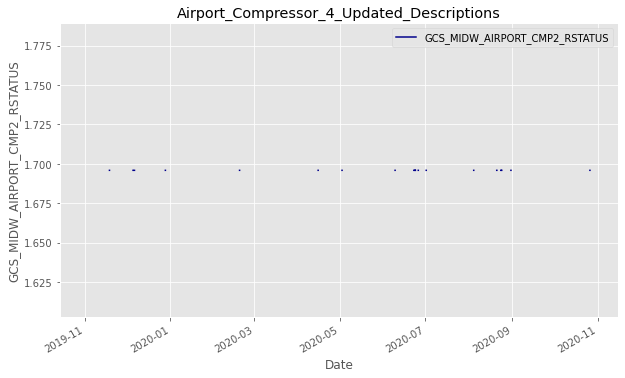

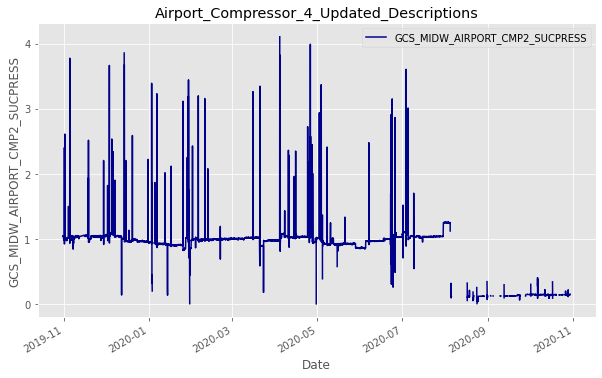

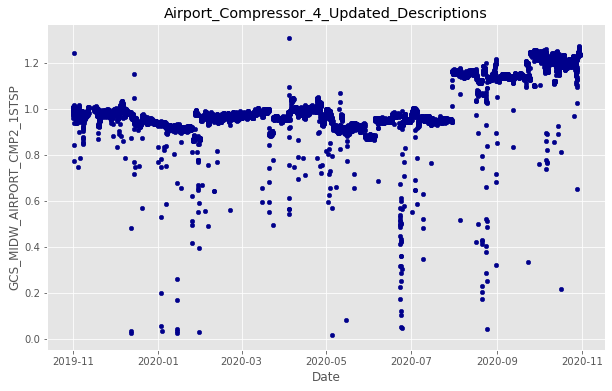

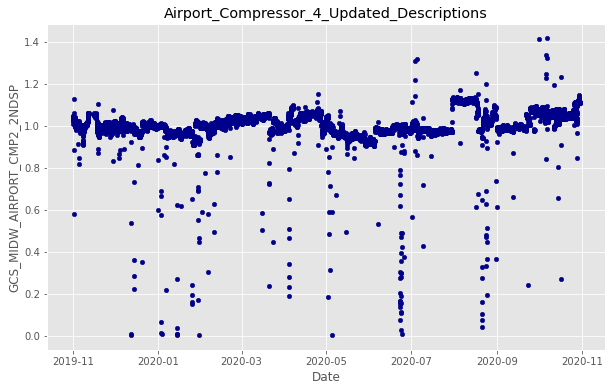

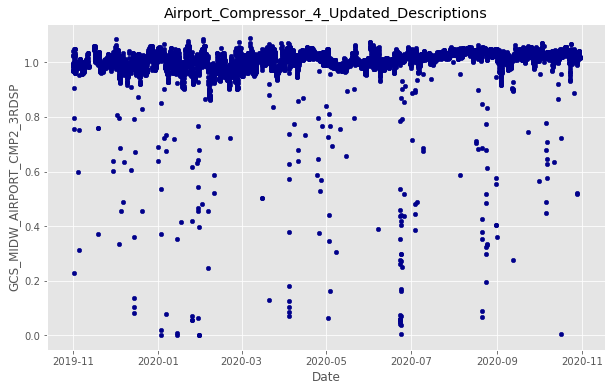

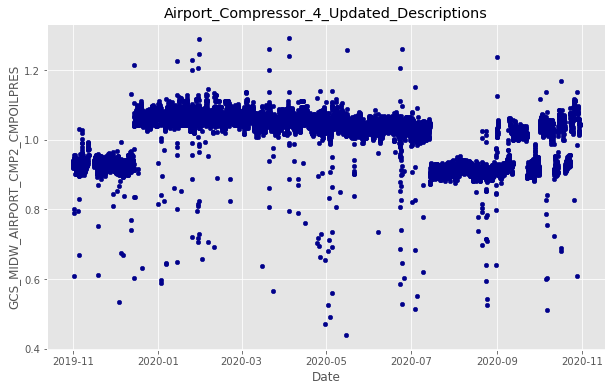

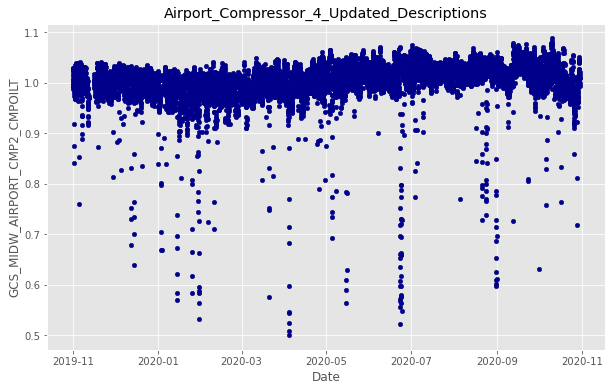

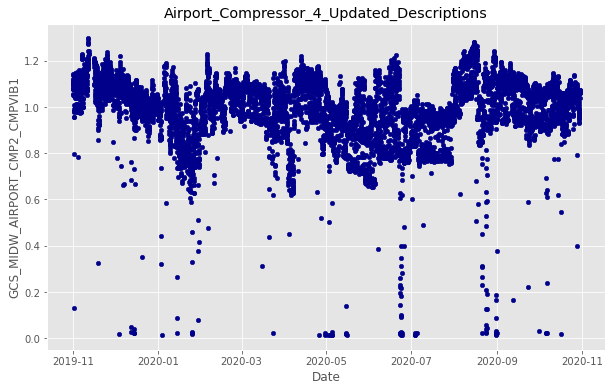

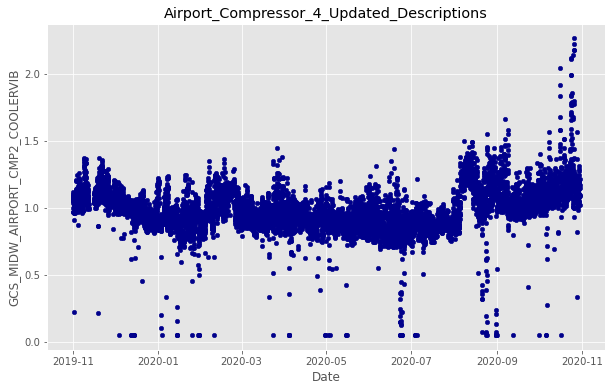

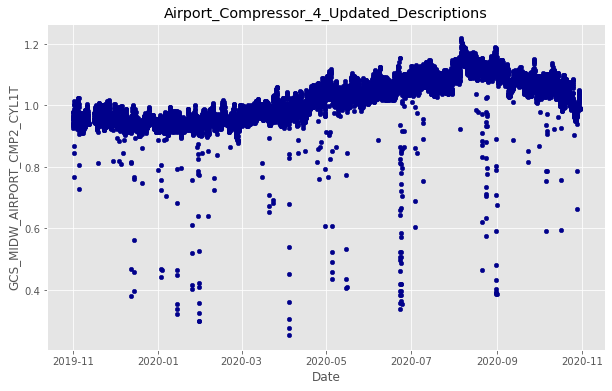

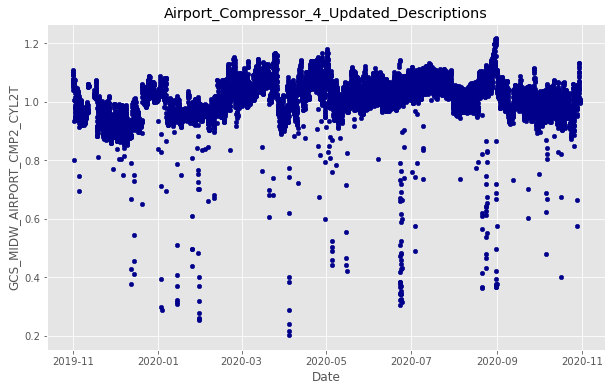

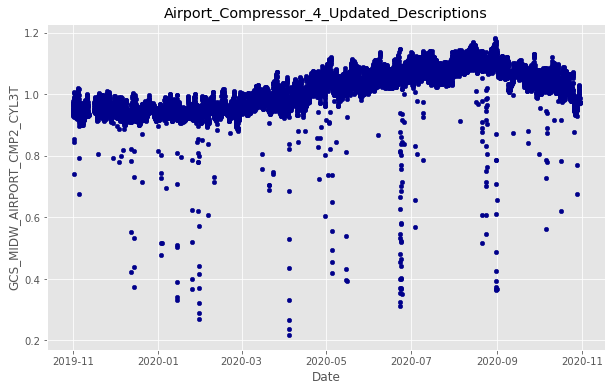

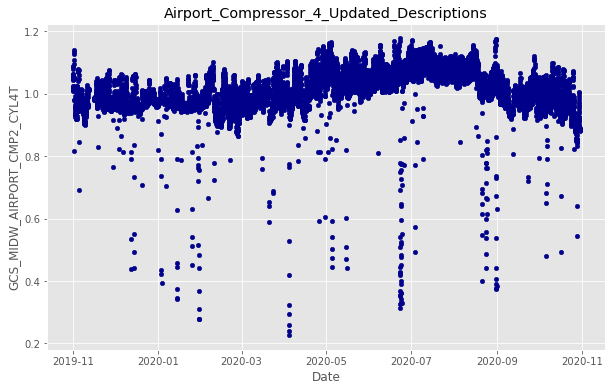

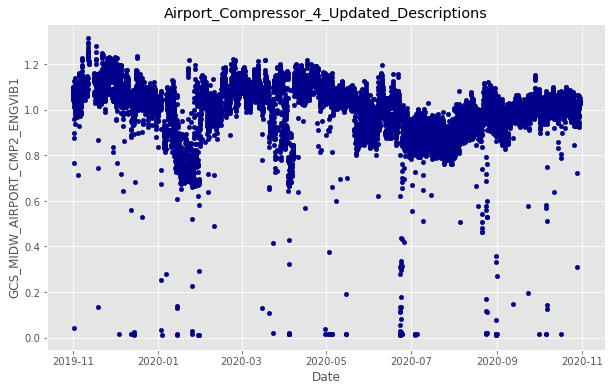

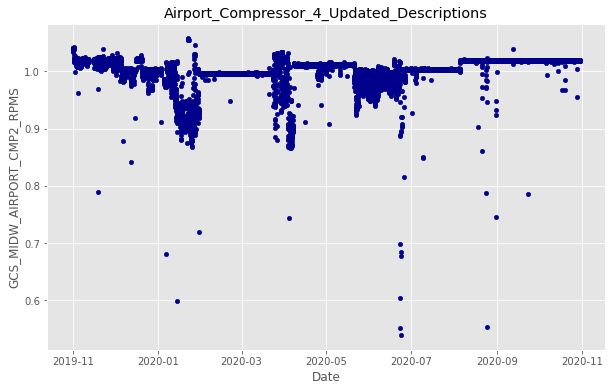

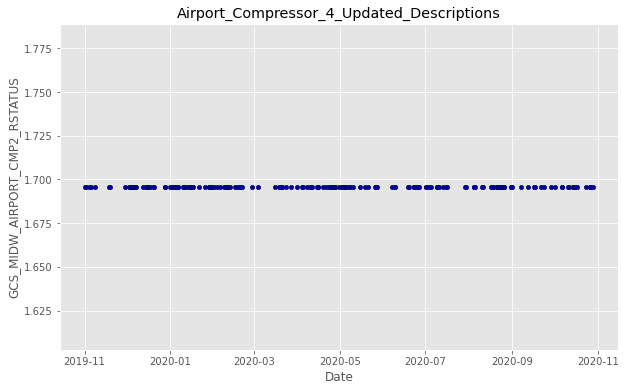

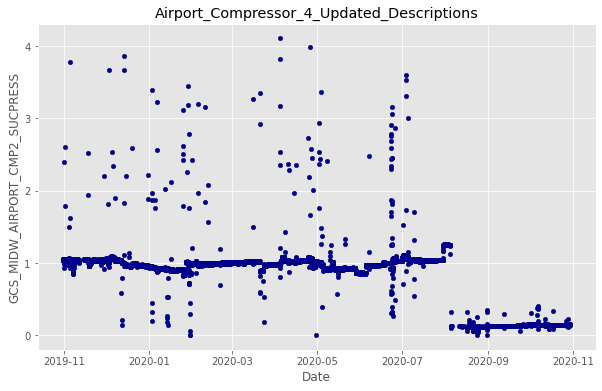

In [34]:
n=1
df_hour_cols=df_hour.columns
while n < df_hour.shape[1]:
    df_hour.plot(kind='line', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_hour_cols=df_hour.columns
while n < df_hour.shape[1]:
    df_hour.plot(kind='scatter', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Group by day

In [35]:
# Group by datetime to nearest hour
df_day = df_min.copy(deep=True)
df_day['DateTime'] = df_day['DateTime'].dt.round('D')
df_day = df_day.groupby(['DateTime'], as_index=False).mean()
display(df_day.describe())
display(df_day)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                   363.000000                   363.000000   
mean                      0.996811                     0.996421   
std                       0.117354                     0.077556   
min                       0.032126                     0.007535   
25%                       0.939248                     0.970838   
50%                       0.966090                     0.993620   
75%                       1.031284                     1.034632   
max                       1.248117                     1.126446   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                   362.000000                        363.000000   
mean                      0.997463                          1.004533   
std                       0.046676                          0.062950   
min                       0.601435                          0.846299   
25%                       0.982548                          0.928232   
50%                       1.006199                          1.032416   
75%                       1.026222                          1.053573   
max                       1.057364                          1.100680   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                     363.000000                     363.000000   
mean                        0.996692                       0.991817   
std                         0.034047                       0.113989   
min                         0.669408                       0.014297   
25%                         0.986059                       0.924295   
50%                         1.002852                       1.015251   
75%                         1.014682                       1.063019   
max                         1.053680                       1.230370   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                       363.000000                   363.000000   
mean                          0.991115                     1.004213   
std                           0.135561                     0.075353   
min                           0.050070                     0.464871   
25%                           0.894492                     0.949534   
50%                           0.967473                     1.003322   
75%                           1.076068                     1.061855   
max                           1.657440                     1.164812   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                   363.000000                   363.000000   
mean                      1.000496                     1.002625   
std                       0.070677                     0.068556   
min                       0.289876                     0.518313   
25%                       0.965259                     0.950046   
50%                       1.008739                     1.006573   
75%                       1.045211                     1.057168   
max                       1.148181                     1.131246   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                   363.000000                     363.000000   
mean                      1.002524                       0.992626   
std                       0.066588                       0.113955   
min                       0.394358                       0.011238   
25%                       0.969267                       0.940509   
50%                       0.997589                       1.010215   
75%                       1.052120                       1.061776   
max                       1.123731                       1.241965   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                  362.000000                   1.320000e+02   
mean                     1.000878                   1.695853e+00   
std                      0.023223           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     1.004246                     1.045573   
1   2019-11-01                     0.971185                     1.028763   
2   2019-11-02                     0.995966                     0.996155   
3   2019-11-03                     0.956061                     0.996042   
4   2019-11-04                     0.961299                     1.002622   
..         ...                          ...                          ...   
358 2020-10-26                     1.197141                     1.059522   
359 2020-10-27                     1.194734                     1.082634   
360 2020-10-28                     1.119492                     1.045650   
361 2020-10-29                     1.222210                     1.100433   
362 2020-10-30                     1.248117                     1.122795   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.028565                          0.939403   
1                       0.956921                          0.924494   
2                       0.962926                          0.906656   
3                       0.982161                          0.919130   
4                       0.975104                          0.928524   
..                           ...                               ...   
358                     1.024199                          1.052786   
359                     1.016215                          1.090691   
360                     0.941452                          0.980071   
361                     1.022254                          1.075987   
362                     1.030915                          1.037836   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.994926                       1.077474   
1                         0.992398                       1.094253   
2                         0.988903                       1.063918   
3                         1.013562                       1.080270   
4                         0.998504                       1.062935   
..                             ...                            ...   
358                       0.955428                       1.028937   
359                       0.959450                       1.069308   
360                       0.952534                       1.044237   
361                       0.979707                       1.026224   
362                       1.025838                       0.995408   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.075921                     0.932958   
1                           1.048231                     0.940384   
2                           1.027231                     0.955015   
3                           1.120292                     0.955677   
4                           1.084525                     0.965175   
..                               ...                          ...   
358                         1.495746                     1.005977   
359                         1.186038                     0.962074   
360                         1.130603                     0.931548   
361                         1.115259                     0.995759   
362                         1.164470                     1.018438   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.047583                     0.936765   
1                       1.067405                     0.939295   
2                       0.998985                     0.947651   
3                       0.991637                     0.952730   
4                       1.007644                     0.963992   
..                           ...                          ...   
358                     0.977574                     0.986979   
359                     1.013843                     0.945767   
360      

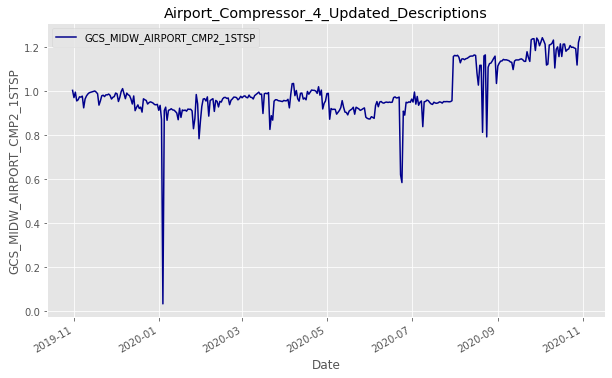

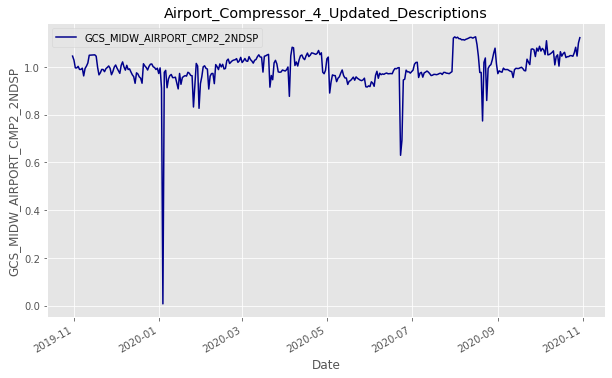

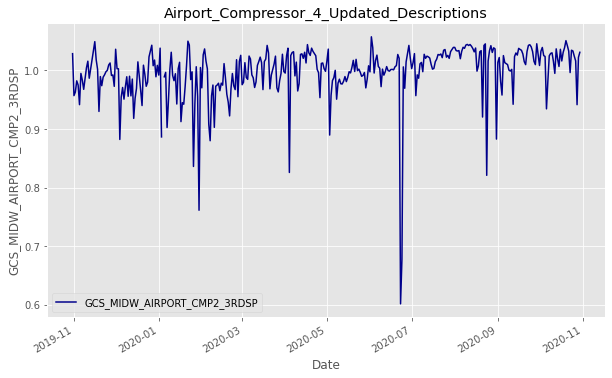

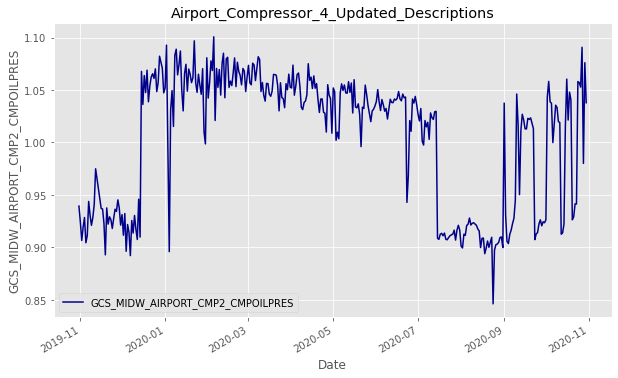

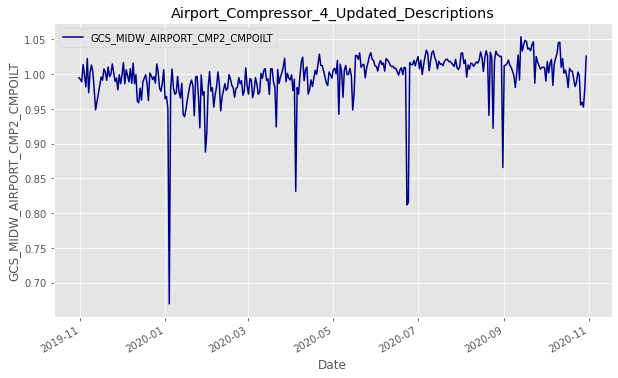

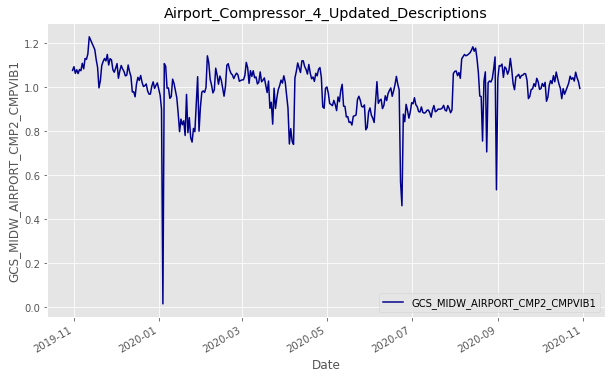

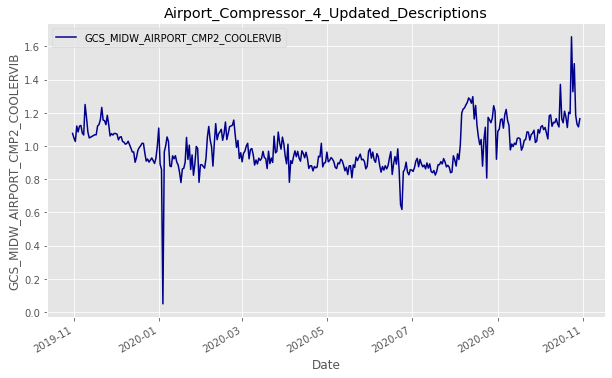

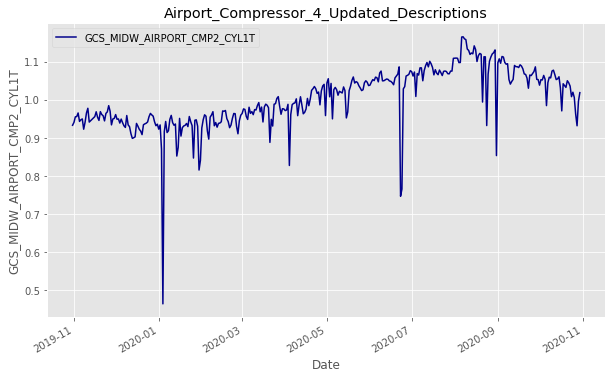

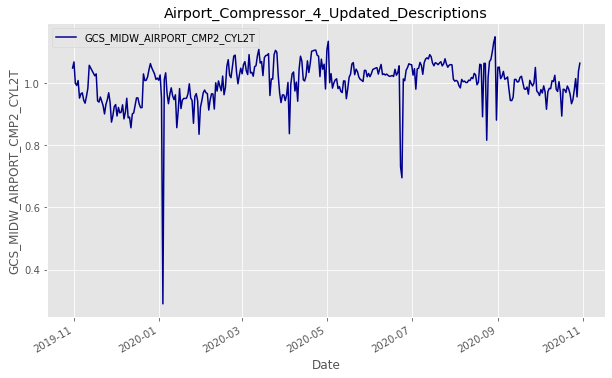

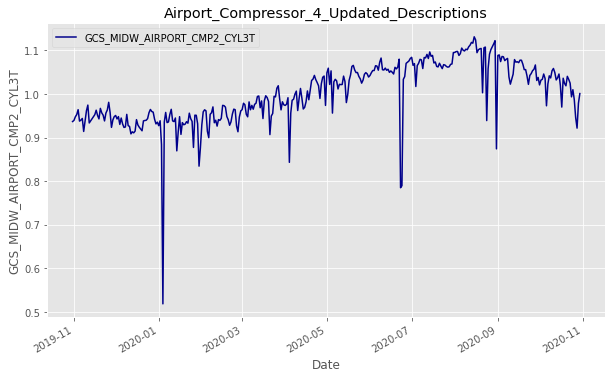

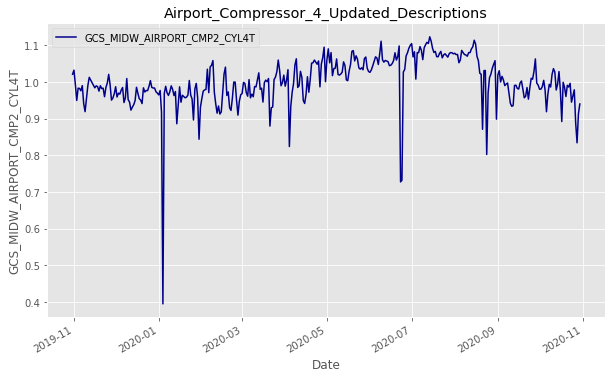

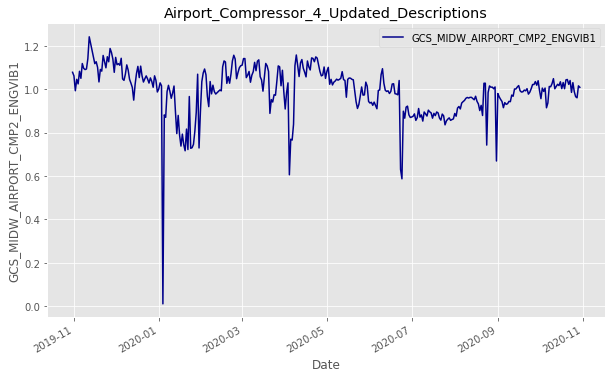

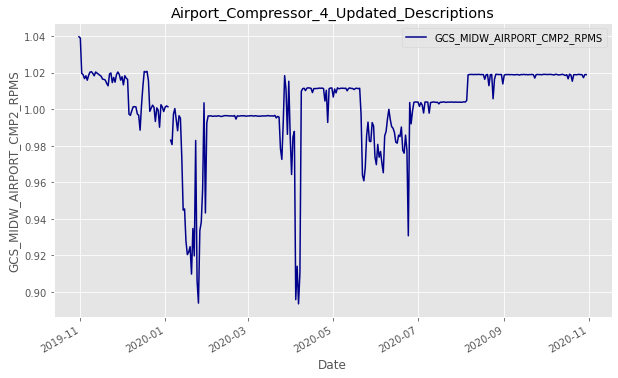

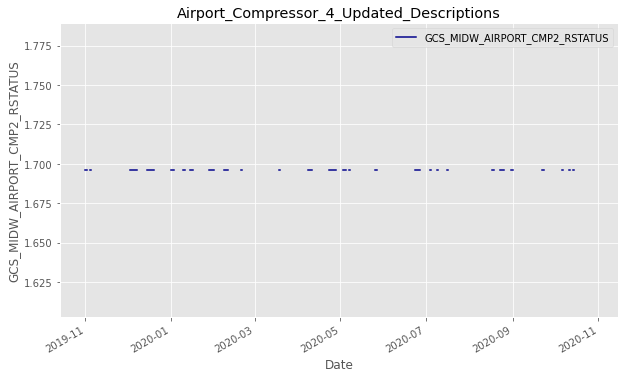

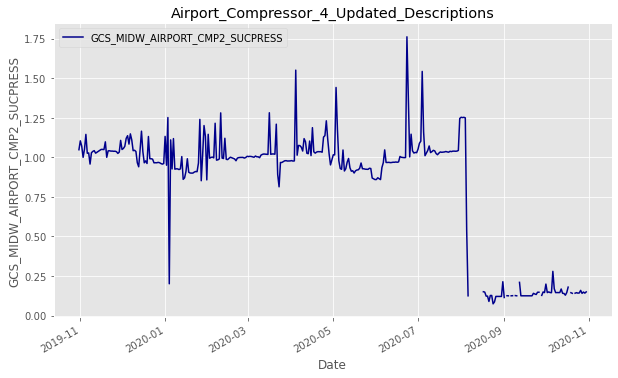

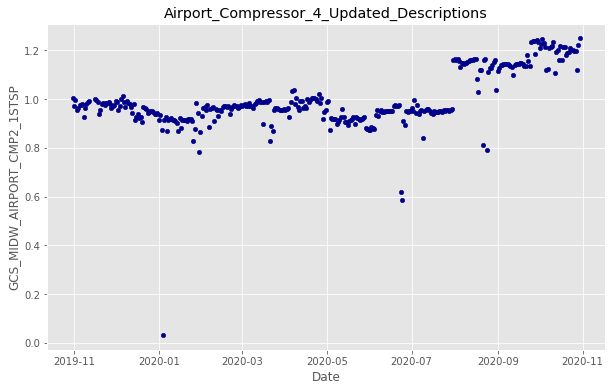

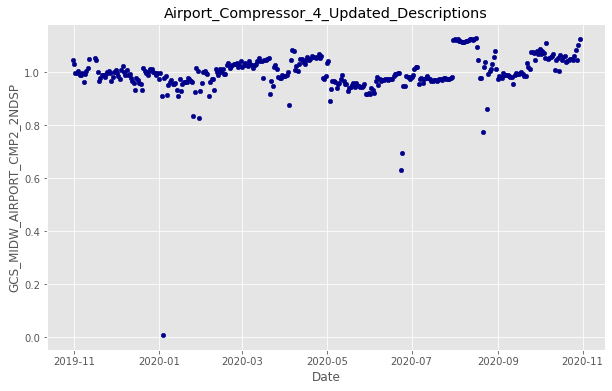

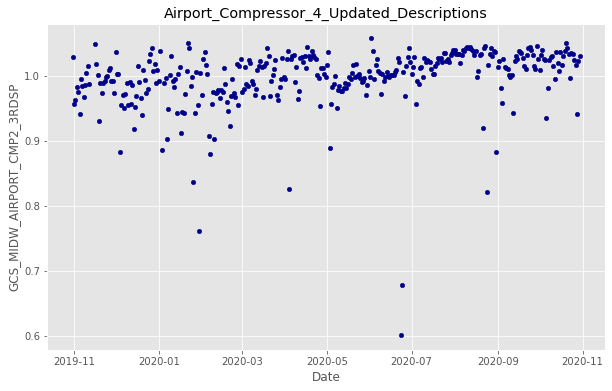

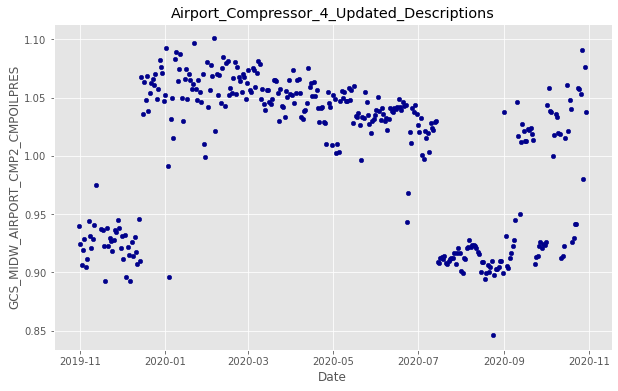

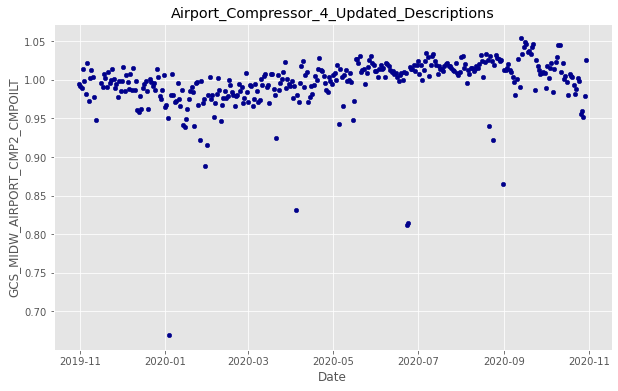

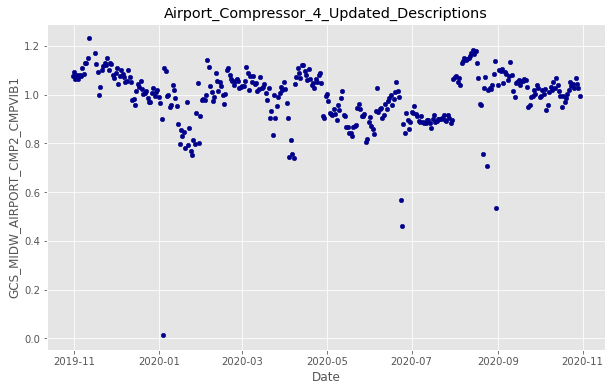

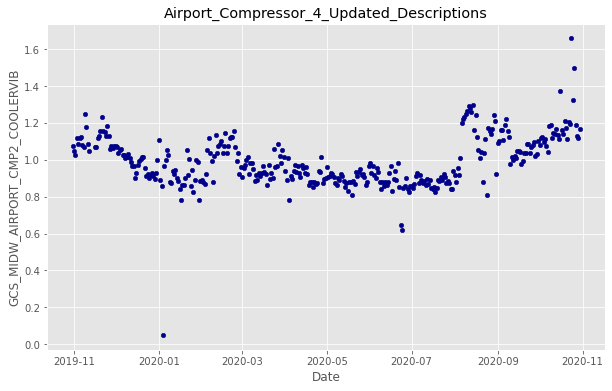

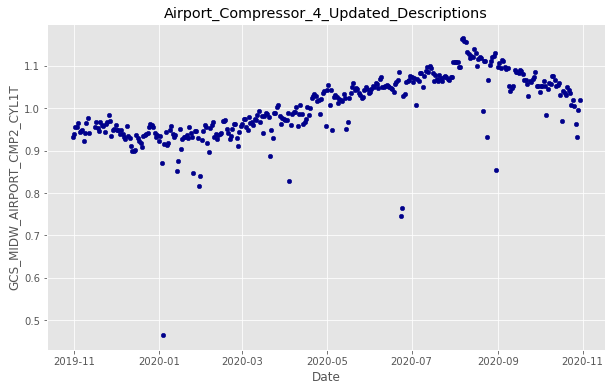

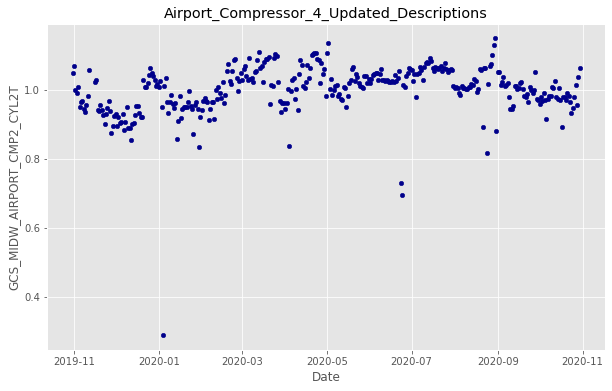

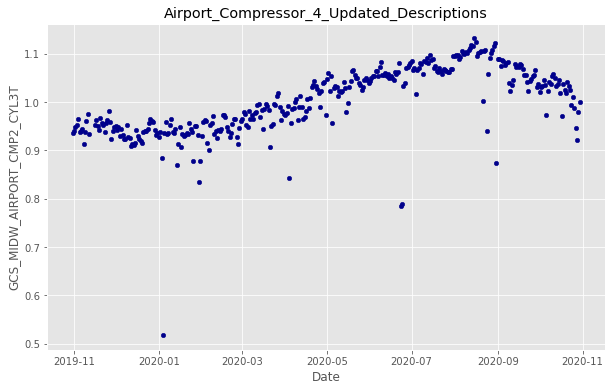

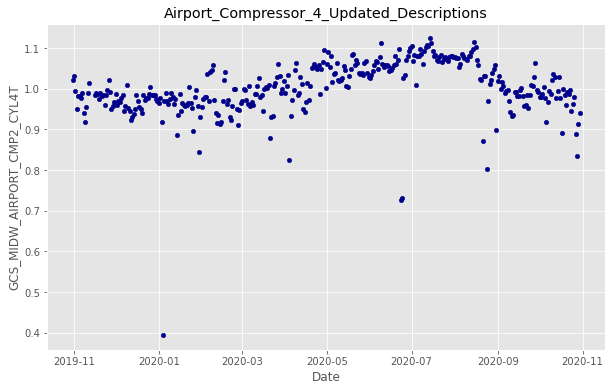

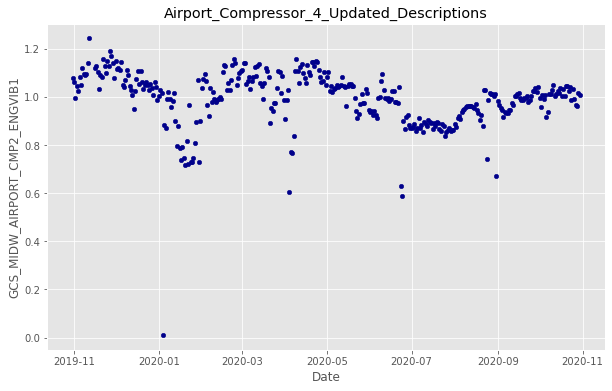

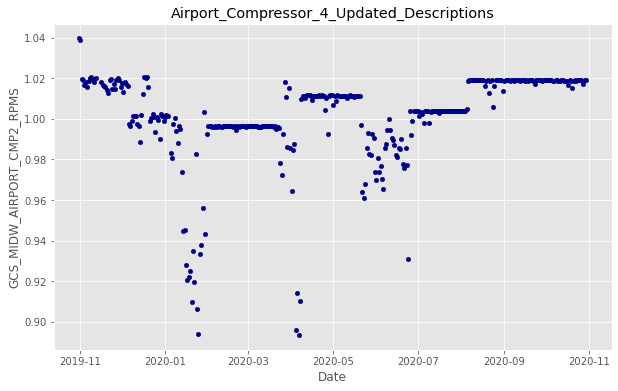

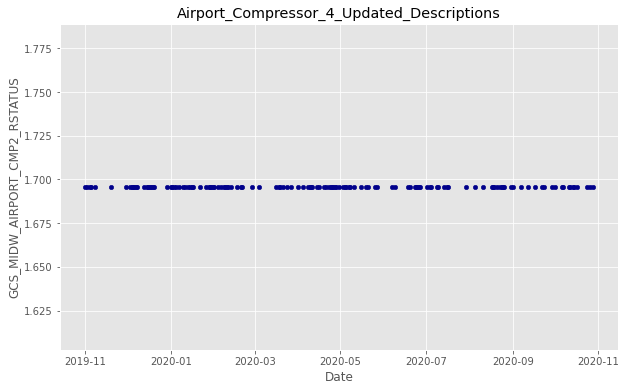

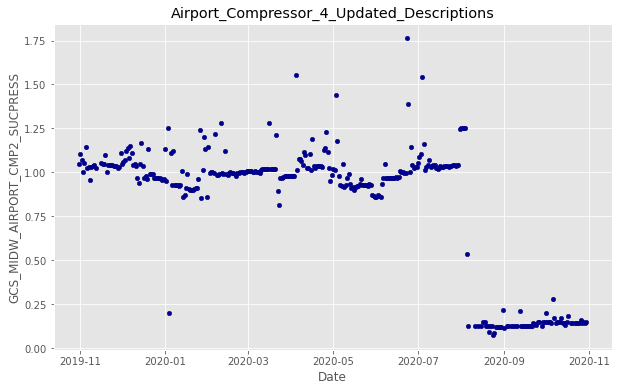

In [36]:
n=1
df_day_cols=df_day.columns
while n < df_day.shape[1]:
    df_day.plot(kind='line', x= df_day_cols[0], y=df_day_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

n=1
df_day_cols=df_day.columns
while n < df_day.shape[1]:
    df_day.plot(kind='scatter', x= df_day_cols[0], y=df_day_cols[n], figsize=(10, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

## Cluster analysis

In [37]:
# Fill NAN cells with surrounding data
df_day_fill = df_day.fillna(method='ffill')
df_day_fill = df_day_fill.fillna(method='bfill')
display(df_day_fill)
display(df_day_fill.isna().describe())

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     1.004246                     1.045573   
1   2019-11-01                     0.971185                     1.028763   
2   2019-11-02                     0.995966                     0.996155   
3   2019-11-03                     0.956061                     0.996042   
4   2019-11-04                     0.961299                     1.002622   
..         ...                          ...                          ...   
358 2020-10-26                     1.197141                     1.059522   
359 2020-10-27                     1.194734                     1.082634   
360 2020-10-28                     1.119492                     1.045650   
361 2020-10-29                     1.222210                     1.100433   
362 2020-10-30                     1.248117                     1.122795   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.028565                          0.939403   
1                       0.956921                          0.924494   
2                       0.962926                          0.906656   
3                       0.982161                          0.919130   
4                       0.975104                          0.928524   
..                           ...                               ...   
358                     1.024199                          1.052786   
359                     1.016215                          1.090691   
360                     0.941452                          0.980071   
361                     1.022254                          1.075987   
362                     1.030915                          1.037836   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.994926                       1.077474   
1                         0.992398                       1.094253   
2                         0.988903                       1.063918   
3                         1.013562                       1.080270   
4                         0.998504                       1.062935   
..                             ...                            ...   
358                       0.955428                       1.028937   
359                       0.959450                       1.069308   
360                       0.952534                       1.044237   
361                       0.979707                       1.026224   
362                       1.025838                       0.995408   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.075921                     0.932958   
1                           1.048231                     0.940384   
2                           1.027231                     0.955015   
3                           1.120292                     0.955677   
4                           1.084525                     0.965175   
..                               ...                          ...   
358                         1.495746                     1.005977   
359                         1.186038                     0.962074   
360                         1.130603                     0.931548   
361                         1.115259                     0.995759   
362                         1.164470                     1.018438   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.047583                     0.936765   
1                       1.067405                     0.939295   
2                       0.998985                     0.947651   
3                       0.991637                     0.952730   
4                       1.007644                     0.963992   
..                           ...                          ...   
358                     0.977574                     0.986979   
359                     1.013843                     0.945767   
360      

DateTime GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count       363                         363                         363   
unique        1                           1                           1   
top       False                       False                       False   
freq        363                         363                         363   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                          363                              363   
unique                           1                                1   
top                          False                            False   
freq                           363                              363   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                            363                           363   
unique                             1                             1   
top                            False                         False   
freq                             363                           363   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                              363                         363   
unique                               1                           1   
top                              False                       False   
freq                               363                         363   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                          363                         363   
unique                           1                           1   
top                          False                       False   
freq                           363                         363   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                          363                           363   
unique                           1                             1   
top                          False                         False   
freq                           363                           363   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                         363                           363   
unique                          1                             1   
top                         False                         False   
freq                          363                           363   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                             363  
unique                              1  
top                             False  
freq                              363

In [38]:
df_day_fill.columns

Index(['DateTime', 'GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

In [39]:
# Find k value that gives best separation between clusters

# Create list of columns
day_fill_cols=df_day_fill.columns

# Create new df without datetime column
df_cluster = df_day_fill[day_fill_cols[1:]]

k_values=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in k_values:
    # set number of clusters
    kclusters = k  # evaluating 3-20
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)
    # Check cluster labels generated for each row in the dataframe
    # Check distribution of neghborhoods in each cluster
    from collections import Counter
    print(k, Counter(kmeans.labels_))

3 Counter({0: 275, 1: 87, 2: 1})
4 Counter({0: 155, 2: 120, 1: 87, 3: 1})
5 Counter({3: 151, 1: 119, 0: 87, 4: 5, 2: 1})
6 Counter({3: 137, 4: 89, 1: 87, 0: 44, 5: 5, 2: 1})
7 Counter({3: 96, 1: 87, 4: 71, 6: 58, 0: 45, 5: 5, 2: 1})
8 Counter({1: 84, 3: 80, 5: 75, 2: 71, 0: 44, 7: 5, 6: 3, 4: 1})
9 Counter({3: 91, 1: 84, 8: 61, 2: 56, 0: 42, 7: 21, 5: 4, 6: 3, 4: 1})
10 Counter({1: 90, 4: 65, 8: 61, 7: 57, 2: 42, 5: 20, 0: 19, 6: 5, 9: 3, 3: 1})
11 Counter({0: 68, 9: 62, 8: 60, 2: 43, 5: 41, 6: 41, 1: 22, 7: 19, 4: 3, 10: 3, 3: 1})
12 Counter({4: 65, 8: 61, 10: 54, 11: 44, 2: 40, 1: 37, 0: 19, 7: 17, 5: 17, 6: 5, 9: 3, 3: 1})
13 Counter({10: 62, 11: 62, 6: 53, 0: 44, 3: 37, 8: 35, 1: 22, 5: 17, 7: 16, 12: 6, 4: 5, 9: 3, 2: 1})
14 Counter({4: 60, 10: 53, 7: 48, 0: 46, 8: 41, 13: 37, 1: 27, 6: 17, 12: 17, 2: 6, 9: 4, 5: 3, 11: 3, 3: 1})
15 Counter({2: 53, 11: 50, 12: 41, 1: 40, 14: 37, 10: 36, 5: 30, 8: 27, 13: 19, 6: 14, 9: 5, 0: 4, 3: 3, 7: 3, 4: 1})
16 Counter({4: 50, 10: 44, 8: 41, 7

In [40]:
# Run clustering again with k=10 (trying to minimize the size of the clusters to identify days
# that are most similar to each other)

# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

# check cluster labels generated for each row in the dataframe
# Check distribution of neghborhoods in each cluster
from collections import Counter
print(Counter(kmeans.labels_))

Counter({1: 90, 4: 65, 8: 61, 7: 57, 2: 42, 5: 20, 0: 19, 6: 5, 9: 3, 3: 1})


In [41]:
# Add cluster labels to df_day_fill
df_day_fill.insert(1, 'Cluster_Label', kmeans.labels_)

print(df_day_fill.shape)
display(df_day_fill)

(363, 17)


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0   2019-10-31              7                     1.004246   
1   2019-11-01              7                     0.971185   
2   2019-11-02              7                     0.995966   
3   2019-11-03              7                     0.956061   
4   2019-11-04              7                     0.961299   
..         ...            ...                          ...   
358 2020-10-26              0                     1.197141   
359 2020-10-27              4                     1.194734   
360 2020-10-28              4                     1.119492   
361 2020-10-29              4                     1.222210   
362 2020-10-30              4                     1.248117   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                       1.045573                     1.028565   
1                       1.028763                     0.956921   
2                       0.996155                     0.962926   
3                       0.996042                     0.982161   
4                       1.002622                     0.975104   
..                           ...                          ...   
358                     1.059522                     1.024199   
359                     1.082634                     1.016215   
360                     1.045650                     0.941452   
361                     1.100433                     1.022254   
362                     1.122795                     1.030915   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                            0.939403                       0.994926   
1                            0.924494                       0.992398   
2                            0.906656                       0.988903   
3                            0.919130                       1.013562   
4                            0.928524                       0.998504   
..                                ...                            ...   
358                          1.052786                       0.955428   
359                          1.090691                       0.959450   
360                          0.980071                       0.952534   
361                          1.075987                       0.979707   
362                          1.037836                       1.025838   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                         1.077474                         1.075921   
1                         1.094253                         1.048231   
2                         1.063918                         1.027231   
3                         1.080270                         1.120292   
4                         1.062935                         1.084525   
..                             ...                              ...   
358                       1.028937                         1.495746   
359                       1.069308                         1.186038   
360                       1.044237                         1.130603   
361                       1.026224                         1.115259   
362                       0.995408                         1.164470   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                       0.932958                     1.047583   
1                       0.940384                     1.067405   
2                       0.955015                     0.998985   
3                       0.955677                     0.991637   
4                       0.965175                     1.007644   
..                           ...                          ...   
358                     1.005977                     0.977574   
359                     0.962074                     1.013843   
360                     0.931548                     0.955060   
361                     0.995759                     1.036613   
362                     1.018438               

In [42]:
# Print clusters and separate dataframes
for label in range(kclusters-1):
    name = 'Cluster_'+str(label)
    name = df_day_fill.loc[df_day_fill['Cluster_Label'] == label]
    print('Cluster_'+str(label))
    display(name)

Cluster_0


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
277 2020-08-06              0                     1.146918   
278 2020-08-07              0                     1.147932   
279 2020-08-08              0                     1.143947   
280 2020-08-09              0                     1.148331   
281 2020-08-10              0                     1.150220   
282 2020-08-11              0                     1.154711   
283 2020-08-12              0                     1.159509   
284 2020-08-13              0                     1.160451   
285 2020-08-14              0                     1.160383   
286 2020-08-15              0                     1.165539   
287 2020-08-16              0                     1.163206   
288 2020-08-17              0                     1.082594   
300 2020-08-29              0                     1.149955   
301 2020-08-30              0                     1.160091   
309 2020-09-07              0                     1.143484   
348 2020-10-16              0                     1.216079   
356 2020-10-24              0                     1.199925   
357 2020-10-25              0                     1.201087   
358 2020-10-26              0                     1.197141   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
277                     1.113712                     1.032586   
278                     1.114705                     1.039482   
279                     1.112556                     1.037652   
280                     1.116004                     1.043233   
281                     1.118164                     1.044355   
282                     1.120862                     1.042512   
283                     1.124140                     1.044176   
284                     1.123842                     1.041363   
285                     1.120825                     1.037331   
286                     1.124059                     1.031637   
287                     1.126446                     1.038163   
288                     1.093933                     0.998721   
300                     1.057791                     1.038569   
301                     1.078828                     1.036631   
309                     0.988958                     1.011531   
348                     1.064057                     1.036047   
356                     1.047365                     1.034453   
357                     1.044848                     1.033208   
358                     1.059522                     1.024199   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
277                          0.922177                       1.013114   
278                          0.928016                       1.007121   
279                          0.921367                       1.015610   
280                          0.923077                       1.014901   
281                          0.923558                       1.011087   
282                          0.922384                       1.014590   
283                          0.921098                       1.017571   
284                          0.917596                       1.015857   
285                          0.915713                       1.020209   
286                          0.899918                       1.031863   
287                          0.908705                       1.023951   
288                          0.908962                       1.003863   
300                          0.909584                       1.025085   
301                          0.909963                       1.025454   
309                          0.922785                       1.004112   
348                          1.060381                       0.997059   
356                          1.058020                       1.002852   
357                          1.057042                       0.998088   
358                          1.052786                       0.955428   

     GCS_MIDW_AIRPORT_C

Cluster_1


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
42  2019-12-15              1                     0.911728   
43  2019-12-16              1                     0.926425   
44  2019-12-17              1                     0.938003   
45  2019-12-18              1                     0.921571   
46  2019-12-19              1                     0.927868   
..         ...            ...                          ...   
175 2020-04-26              1                     0.982189   
176 2020-04-27              1                     1.005436   
179 2020-04-30              1                     0.956008   
180 2020-05-01              1                     0.989401   
191 2020-05-12              1                     0.957390   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
42                      0.931604                     0.952588   
43                      0.975547                     0.969201   
44                      0.970719                     1.014576   
45                      0.958624                     0.990871   
46                      0.952909                     0.965998   
..                           ...                          ...   
175                     1.051644                     0.953457   
176                     1.059379                     1.011886   
179                     0.985993                     0.998433   
180                     1.034296                     1.015941   
191                     0.987501                     0.976785   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
42                           1.067712                       0.962544   
43                           1.036227                       0.988845   
44                           1.063732                       0.994057   
45                           1.047634                       0.999062   
46                           1.068882                       0.986029   
..                                ...                            ...   
175                          1.009948                       0.987255   
176                          1.055063                       0.983710   
179                          1.008887                       0.994062   
180                          1.051947                       1.006194   
191                          1.057918                       0.999746   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
42                        0.957193                         0.902095   
43                        1.015727                         0.930761   
44                        1.045572                         0.974124   
45                        1.031720                         0.990934   
46                        1.054232                         1.001518   
..                             ...                              ...   
175                       1.090194                         0.934343   
176                       1.045875                         1.016527   
179                       0.995763                         0.901392   
180                       1.002034                         0.963273   
191                       1.013918                         0.911382   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
42                      0.902541                     0.926796   
43                      0.937781                     0.951688   
44                      0.930588                     0.951849   
45                      0.922433                     0.931057   
46                      0.917622                     0.920287   
..                           ...                          ...   
175                     0.986428                     1.020305   
176                     1.022895                     1.076383   
179                     0.958312                     0.980455   
180                     1.043726                     1.106366   
191                     1.017565               

Cluster_2


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
182 2020-05-03              2                     0.872639   
183 2020-05-04              2                     0.921595   
236 2020-06-26              2                     0.891409   
237 2020-06-27              2                     0.950077   
238 2020-06-28              2                     0.947572   
239 2020-06-29              2                     0.952025   
240 2020-06-30              2                     0.949717   
241 2020-07-01              2                     0.964272   
242 2020-07-02              2                     0.950994   
243 2020-07-03              2                     0.996506   
244 2020-07-04              2                     0.941398   
245 2020-07-05              2                     0.976421   
246 2020-07-06              2                     0.936363   
247 2020-07-07              2                     0.950504   
248 2020-07-08              2                     0.955759   
249 2020-07-09              2                     0.838932   
250 2020-07-10              2                     0.952108   
251 2020-07-11              2                     0.953751   
252 2020-07-12              2                     0.959808   
253 2020-07-13              2                     0.957432   
254 2020-07-14              2                     0.948825   
255 2020-07-15              2                     0.942526   
256 2020-07-16              2                     0.940187   
257 2020-07-17              2                     0.950248   
258 2020-07-18              2                     0.946611   
259 2020-07-19              2                     0.945407   
260 2020-07-20              2                     0.947351   
261 2020-07-21              2                     0.951707   
262 2020-07-22              2                     0.950311   
263 2020-07-23              2                     0.946233   
264 2020-07-24              2                     0.953375   
265 2020-07-25              2                     0.952485   
266 2020-07-26              2                     0.953212   
267 2020-07-27              2                     0.952973   
268 2020-07-28              2                     0.952084   
269 2020-07-29              2                     0.953167   
270 2020-07-30              2                     0.957025   
271 2020-07-31              2                     1.158479   
272 2020-08-01              2                     1.163572   
273 2020-08-02              2                     1.161195   
274 2020-08-03              2                     1.163936   
275 2020-08-04              2                     1.155083   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
182                     0.890794                     0.889582   
183                     0.937441                     0.957175   
236                     0.948662                     0.969446   
237                     0.986641                     1.014601   
238                     0.979428                     1.028898   
239                     0.979748                     1.042676   
240                     0.974234                     1.021134   
241                     0.980818                     1.003066   
242                     0.986990                     1.013188   
243                     1.011200                     1.028647   
244                     1.018651                     0.956874   
245                     1.019874                     0.992363   
246                     0.955967                     0.986638   
247                     0.974230                     1.011211   
248                     0.977508                     1.013575   
249                     0.957335                     0.997770   
250                     0.975285                     1.027472   
251                     0.978530                     1.020637   
252                     0.982922                     1.024328   
253                     0.978593       

Cluster_3


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
62 2020-01-04              3                     0.032126   

    GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
62                     0.007535                     0.886446   

    GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
62                          0.896027                       0.669408   

    GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
62                       0.014297                          0.05007   

    GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
62                     0.464871                     0.289876   

    GCS_MIDW_AIRPORT_CMP2_CYL3T  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
62                     0.518313                     0.394358   

    GCS_MIDW_AIRPORT_CMP2_ENGVIB1  GCS_MIDW_AIRPORT_CMP2_RPMS  \
62                       0.011238                    1.001372   

    GCS_MIDW_AIRPORT_CMP2_RSTATUS  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
62                       1.695853                        0.201116

Cluster_4


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
276 2020-08-05              4                     1.129656   
289 2020-08-18              4                     1.028076   
290 2020-08-19              4                     1.118097   
291 2020-08-20              4                     1.118595   
293 2020-08-22              4                     1.161077   
..         ...            ...                          ...   
355 2020-10-23              4                     1.208398   
359 2020-10-27              4                     1.194734   
360 2020-10-28              4                     1.119492   
361 2020-10-29              4                     1.222210   
362 2020-10-30              4                     1.248117   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
276                     1.118235                     1.019921   
289                     1.045011                     1.007611   
290                     0.976919                     1.031787   
291                     0.977155                     1.033693   
293                     1.018679                     1.042567   
..                           ...                          ...   
355                     1.047636                     0.996284   
359                     1.082634                     1.016215   
360                     1.045650                     0.941452   
361                     1.100433                     1.022254   
362                     1.122795                     1.030915   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
276                          0.920960                       0.995565   
289                          0.894072                       1.022796   
290                          0.899308                       1.033576   
291                          0.906128                       1.026142   
293                          0.904834                       1.031454   
..                                ...                            ...   
355                          0.941378                       0.988153   
359                          1.090691                       0.959450   
360                          0.980071                       0.952534   
361                          1.075987                       0.979707   
362                          1.037836                       1.025838   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
276                       1.041194                         1.006895   
289                       1.066714                         1.054984   
290                       0.960582                         1.008786   
291                       0.958442                         1.039542   
293                       1.028002                         1.037689   
..                             ...                              ...   
355                       1.051116                         1.194968   
359                       1.069308                         1.186038   
360                       1.044237                         1.130603   
361                       1.026224                         1.115259   
362                       0.995408                         1.164470   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
276                     1.097471                     0.983877   
289                     1.115426                     1.002109   
290                     1.121222                     1.059936   
291                     1.118969                     1.057896   
293                     1.112446                     1.062865   
..                           ...                          ...   
355                     1.035652                     0.963722   
359                     0.962074                     1.013843   
360                     0.931548                     0.955060   
361                     0.995759                     1.036613   
362                     1.018438               

Cluster_5


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
71  2020-01-13              5                     0.908124   
72  2020-01-14              5                     0.900701   
73  2020-01-15              5                     0.870458   
74  2020-01-16              5                     0.922975   
75  2020-01-17              5                     0.881100   
76  2020-01-18              5                     0.914936   
77  2020-01-19              5                     0.912098   
78  2020-01-20              5                     0.914616   
79  2020-01-21              5                     0.909399   
80  2020-01-22              5                     0.918974   
82  2020-01-24              5                     0.918199   
83  2020-01-25              5                     0.910585   
85  2020-01-27              5                     0.875081   
86  2020-01-28              5                     0.985353   
89  2020-01-31              5                     0.864734   
139 2020-03-21              5                     0.826337   
141 2020-03-23              5                     0.868644   
154 2020-04-05              5                     0.985632   
155 2020-04-06              5                     1.034492   
156 2020-04-07              5                     1.035673   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
71                      0.957200                     0.994284   
72                      0.933408                     0.942603   
73                      0.908109                     1.002727   
74                      0.972866                     1.013840   
75                      0.927477                     0.912541   
76                      0.955699                     0.944901   
77                      0.960527                     0.942249   
78                      0.963755                     0.972317   
79                      0.961741                     1.007969   
80                      0.977852                     1.049885   
82                      0.964494                     0.984327   
83                      0.963269                     0.997563   
85                      0.922880                     0.942519   
86                      1.014867                     1.006241   
89                      0.929930                     1.004859   
139                     0.915401                     0.968502   
141                     0.946504                     1.001602   
154                     1.046242                     1.025438   
155                     1.082622                     1.030517   
156                     1.080284                     1.031881   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
71                           1.049573                       0.986612   
72                           1.030082                       0.941772   
73                           1.065660                       0.938702   
74                           1.074467                       0.949227   
75                           1.048894                       0.962581   
76                           1.069999                       0.974689   
77                           1.065066                       0.985046   
78                           1.057006                       0.991301   
79                           1.061620                       0.983744   
80                           1.096823                       0.940061   
82                           1.047782                       0.996965   
83                           1.065032                       0.967989   
85                           1.045940                       0.998854   
86                           1.070261                       0.969839   
89                           1.080693                       0.915216   
139                          1.064015                       0.924045   
141                          1.030116                       0.986509   
154                          1.064802    

Cluster_6


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
84  2020-01-26              6                     0.829564   
88  2020-01-30              6                     0.783896   
153 2020-04-04              6                     0.924523   
233 2020-06-23              6                     0.619828   
234 2020-06-24              6                     0.584289   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
84                      0.832310                     0.836007   
88                      0.826777                     0.761242   
153                     0.876905                     0.825742   
233                     0.629970                     0.601435   
234                     0.693057                     0.677549   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
84                           1.054696                       0.922731   
88                           0.998654                       0.887888   
153                          1.053475                       0.831336   
233                          0.942951                       0.811919   
234                          0.968376                       0.815054   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
84                        0.813202                         0.824032   
88                        0.800585                         0.781320   
153                       0.742363                         0.781780   
233                       0.569064                         0.647501   
234                       0.461006                         0.618098   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
84                      0.847031                     0.870290   
88                      0.815585                     0.834808   
153                     0.827540                     0.836778   
233                     0.746895                     0.730254   
234                     0.765717                     0.695055   

     GCS_MIDW_AIRPORT_CMP2_CYL3T  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
84                      0.877338                     0.896637   
88                      0.834357                     0.843917   
153                     0.843115                     0.824009   
233                     0.784832                     0.727457   
234                     0.789583                     0.731943   

     GCS_MIDW_AIRPORT_CMP2_ENGVIB1  GCS_MIDW_AIRPORT_CMP2_RPMS  \
84                        0.746264                    0.933628   
88                        0.729631                    0.943260   
153                       0.606027                    0.895769   
233                       0.630878                    0.977523   
234                       0.587368                    0.930745   

     GCS_MIDW_AIRPORT_CMP2_RSTATUS  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
84                        1.695853                        1.240050  
88                        1.695853                        1.132679  
153                       1.695853                        1.551306  
233                       1.695853                        1.762025  
234                       1.695853                        1.389358

Cluster_7


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0   2019-10-31              7                     1.004246   
1   2019-11-01              7                     0.971185   
2   2019-11-02              7                     0.995966   
3   2019-11-03              7                     0.956061   
4   2019-11-04              7                     0.961299   
5   2019-11-05              7                     0.974915   
6   2019-11-06              7                     0.973379   
7   2019-11-07              7                     0.978060   
8   2019-11-08              7                     0.924601   
9   2019-11-09              7                     0.964671   
10  2019-11-10              7                     0.978718   
11  2019-11-11              7                     0.987570   
12  2019-11-12              7                     0.993258   
13  2019-11-16              7                     1.001477   
14  2019-11-17              7                     0.996132   
15  2019-11-18              7                     0.988754   
16  2019-11-19              7                     0.936937   
17  2019-11-20              7                     0.955949   
18  2019-11-21              7                     0.979471   
19  2019-11-22              7                     0.982075   
20  2019-11-23              7                     0.975906   
21  2019-11-24              7                     0.983890   
22  2019-11-25              7                     0.983683   
23  2019-11-26              7                     0.987383   
24  2019-11-27              7                     0.981290   
25  2019-11-28              7                     0.964748   
26  2019-11-29              7                     0.972500   
27  2019-11-30              7                     0.975953   
28  2019-12-01              7                     0.992028   
29  2019-12-02              7                     0.988424   
30  2019-12-03              7                     0.953496   
31  2019-12-04              7                     0.972458   
32  2019-12-05              7                     0.999411   
33  2019-12-06              7                     1.012160   
34  2019-12-07              7                     0.989166   
35  2019-12-08              7                     0.966280   
36  2019-12-09              7                     0.991804   
37  2019-12-10              7                     0.984030   
38  2019-12-11              7                     0.980508   
39  2019-12-12              7                     0.965036   
40  2019-12-13              7                     0.942084   
41  2019-12-14              7                     0.978783   
47  2019-12-20              7                     0.905079   
59  2020-01-01              7                     0.913546   
61  2020-01-03              7                     0.871557   
65  2020-01-07              7                     0.867925   
87  2020-01-29              7                     0.942003   
95  2020-02-06              7                     0.886887   
99  2020-02-10              7                     0.908350   
100 2020-02-11              7                     0.958471   
102 2020-02-13              7                     0.928711   
104 2020-02-15              7                     0.950803   
107 2020-02-18              7                     0.972107   
110 2020-02-21              7                     0.938860   
111 2020-02-22              7                     0.959022   
134 2020-03-16              7                     0.898869   
159 2020-04-10              7                     0.966090   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                       1.045573                     1.028565   
1                       1.028763                     0.956921   
2                       0.996155                     0.962926   
3                       0.996042                     0.982161   
4                       1.002622                     0.975104   
5                  

Cluster_8


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
67  2020-01-09              8                     0.915852   
68  2020-01-10              8                     0.920509   
81  2020-01-23              8                     0.917918   
98  2020-02-09              8                     0.966283   
140 2020-03-22              8                     0.888925   
..         ...            ...                          ...   
229 2020-06-19              8                     0.974499   
230 2020-06-20              8                     0.969669   
231 2020-06-21              8                     0.970713   
232 2020-06-22              8                     0.973796   
235 2020-06-25              8                     0.909525   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
67                      0.963674                     1.001282   
68                      0.968645                     1.030962   
81                      0.973841                     1.043207   
98                      0.972887                     0.975012   
140                     0.964265                     0.991910   
..                           ...                          ...   
229                     0.993651                     1.006157   
230                     0.992502                     1.008198   
231                     0.996257                     1.027155   
232                     0.997498                     1.020609   
235                     0.945720                     1.005984   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
67                           1.088890                       0.972923   
68                           1.064408                       0.996585   
81                           1.057037                       0.995706   
98                           1.069493                       0.986364   
140                          1.054080                       1.006595   
..                                ...                            ...   
229                          1.039674                       1.009120   
230                          1.046115                       0.999306   
231                          1.042583                       1.009756   
232                          1.043337                       1.008807   
235                          1.020854                       1.016524   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
67                        0.949979                         0.879831   
68                        0.958241                         0.875803   
81                        0.862375                         1.005608   
98                        0.974863                         0.878955   
140                       0.932315                         0.927936   
..                             ...                              ...   
229                       1.012557                         0.936351   
230                       1.050056                         0.890784   
231                       1.014483                         0.982976   
232                       0.988576                         0.852086   
235                       0.878049                         0.845203   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
67                      0.948409                     0.963864   
68                      0.958823                     0.984119   
81                      0.955854                     0.997007   
98                      0.968511                     0.964439   
140                     0.948504                     1.013150   
..                           ...                          ...   
229                     1.057072                     1.043760   
230                     1.061792                     1.024719   
231                     1.066947                     1.032882   
232                     1.085988                     1.054834   
235                     1.028382               

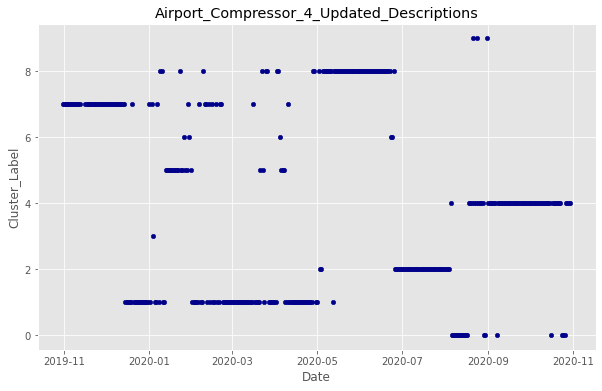

In [43]:
# Plot cluster labels grouped by day
df_day_fill.plot(kind='scatter', x='DateTime', y='Cluster_Label', figsize=(10, 6), color='darkblue')
plt.title(file_name)
plt.xlabel('Date')
plt.ylabel('Cluster_Label')
plt.show()